In [107]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression


In [53]:
df=pd.read_csv("train housing.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [54]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
df.shape

(1168, 81)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# List of categorical & Numerical columns

In [57]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [58]:
print("List of categorical columns:",catCol)

List of categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [59]:
print("List of numerical columns:",numCol)

List of numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# Missing Value Analysis of Dataset

In [60]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [61]:
df[df.isna().sum(axis=1)>1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1166 rows x 81 columns]

# Check Duplicate,Repeated and Unknown values

In [62]:
df[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [63]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

MSZoning ---%Null 0.0
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street ---%Null 0.0
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley ---%Null 93.40753424657534
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape ---%Null 0.0
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour ---%Null 0.0
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities ---%Null 0.0
AllPub    1168
Name: Utilities, dtype: int64


LotConfig ---%Null 0.0
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope ---%Null 0.0
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood ---%Null 0.0
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     3

In [64]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Id ---%Null 0.0
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64


MSSubClass ---%Null 0.0
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


LotFrontage ---%Null 18.32191780821918
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64


LotArea ---%Null 0.0
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64


OverallQual ---%Null 0.0
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


OverallCond ---%Null 0.0
5   

# Descriptive Statistics

In [65]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [66]:
df[numCol].describe

<bound method NDFrame.describe of        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          1976

In [67]:
df[catCol].describe

<bound method NDFrame.describe of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       G

In [68]:
df[catCol].describe().T

count unique      top  freq
MSZoning       1168      5       RL   928
Street         1168      2     Pave  1164
Alley            77      2     Grvl    41
LotShape       1168      4      Reg   740
LandContour    1168      4      Lvl  1046
Utilities      1168      1   AllPub  1168
LotConfig      1168      5   Inside   842
LandSlope      1168      3      Gtl  1105
Neighborhood   1168     25    NAmes   182
Condition1     1168      9     Norm  1005
Condition2     1168      8     Norm  1154
BldgType       1168      5     1Fam   981
HouseStyle     1168      8   1Story   578
RoofStyle      1168      6    Gable   915
RoofMatl       1168      8  CompShg  1144
Exterior1st    1168     14  VinylSd   396
Exterior2nd    1168     15  VinylSd   387
MasVnrType     1161      4     None   696
ExterQual      1168      4       TA   717
ExterCond      1168      5       TA  1022
Foundation     1168      6   CBlock   516
BsmtQual       1138      4       TA   517
BsmtCond       1138      4       TA  1041
BsmtExposure   1137      4       No   756
BsmtFinType1   1138      6      Unf   345
BsmtFinType2   1137      6      Unf  1002
Heating        1168      6     GasA  1143
HeatingQC      1168      5       Ex   585
CentralAir     1168      2        Y  1090
Electrical     1168      5    SBrkr  1070
KitchenQual    1168      4       TA   578
Functional     1168      7      Typ  1085
FireplaceQu     617      5       Gd   301
GarageType     1104      6   Attchd   691
GarageFinish   1104      3      Unf   487
GarageQual     1104      5       TA  1050
GarageCond     1104      5       TA  1061
PavedDrive     1168      3        Y  1071
PoolQC            7      3       Gd     3
Fence           237      4    MnPrv   129
MiscFeature      44      4     Shed    40
SaleType       1168      9       WD   999
SaleCondition  1168      6   Normal   945

# Univariate Analysis

In [69]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

MSZoning
5
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street
2
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
2
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape
4
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour
4
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities
1
AllPub    1168
Name: Utilities, dtype: int64


LotConfig
5
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope
3
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood
25
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDal

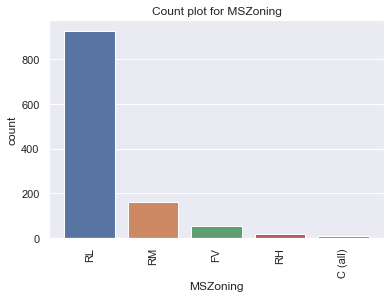

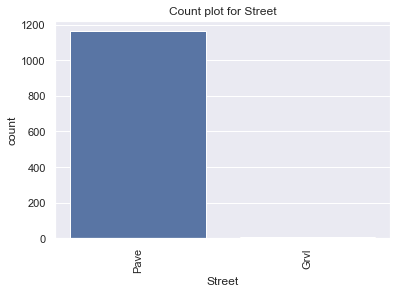

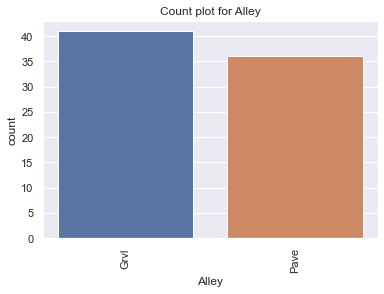

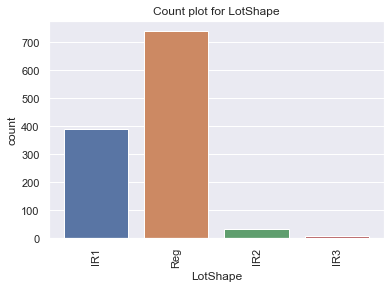

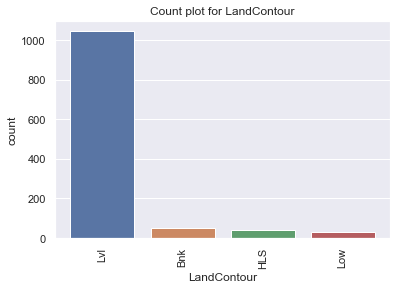

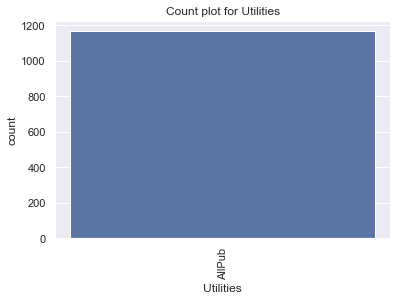

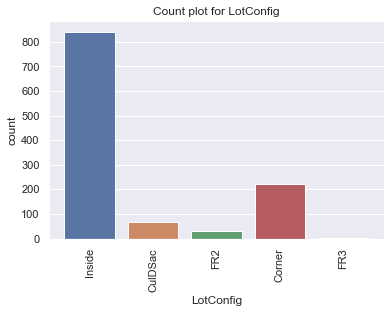

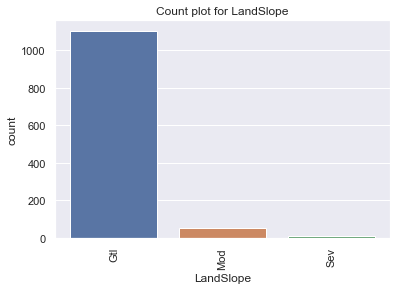

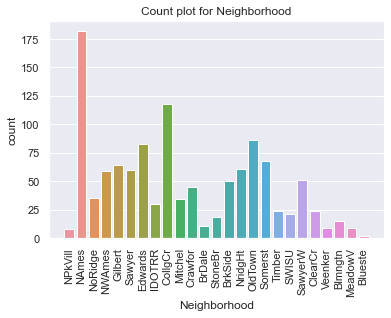

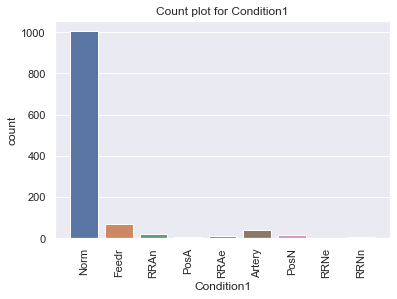

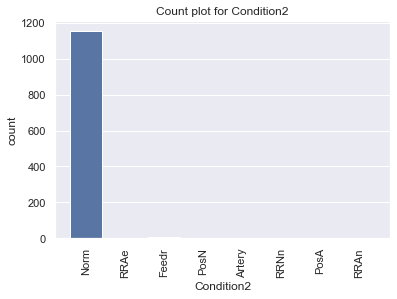

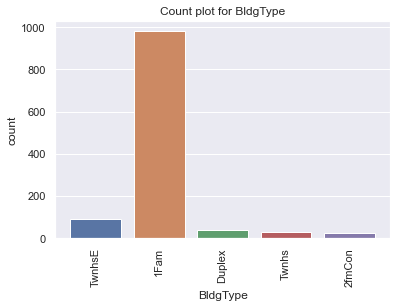

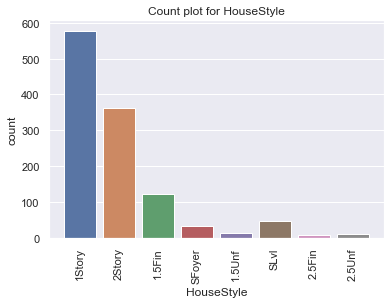

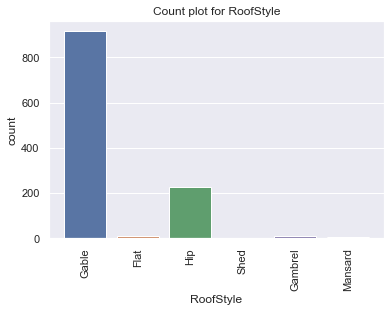

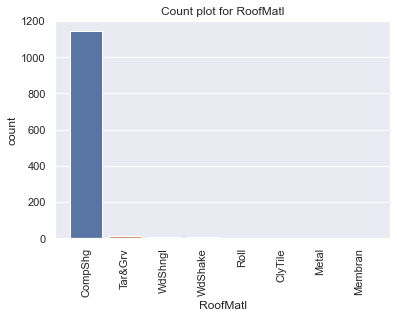

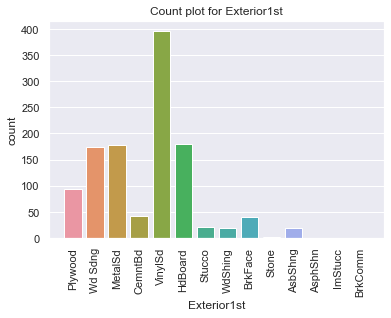

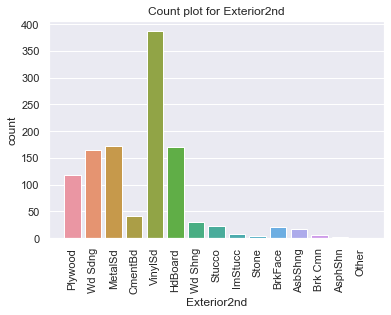

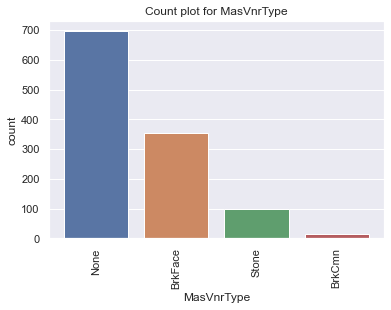

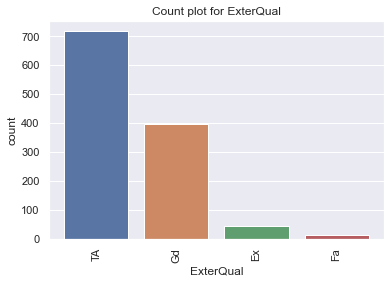

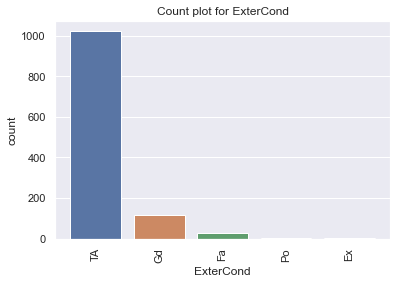

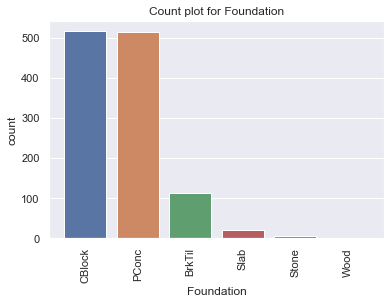

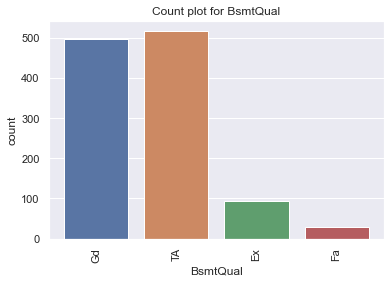

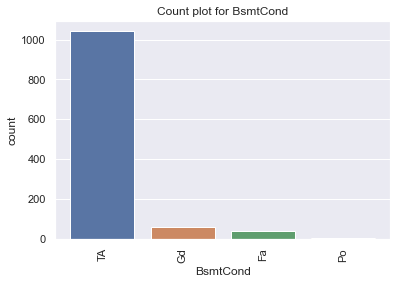

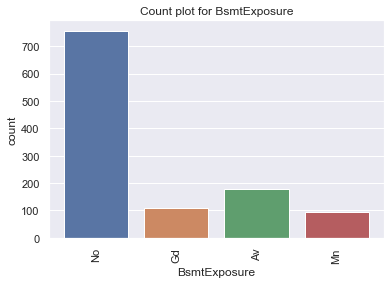

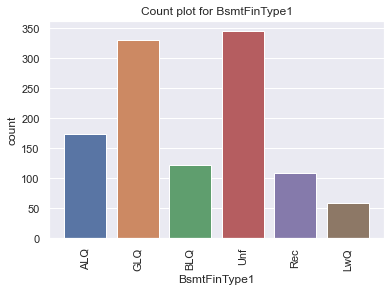

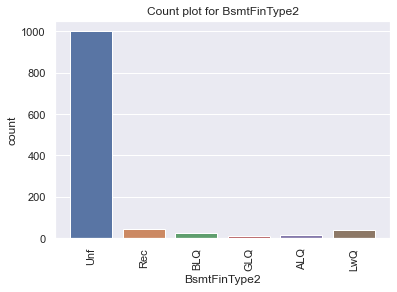

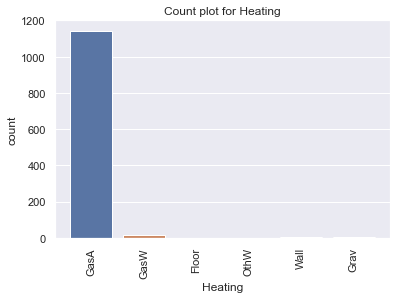

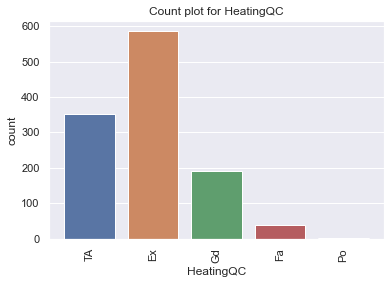

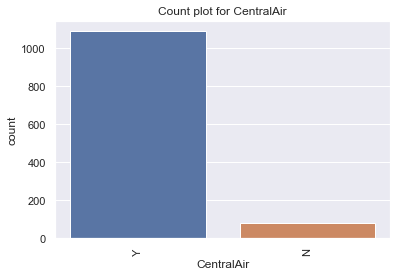

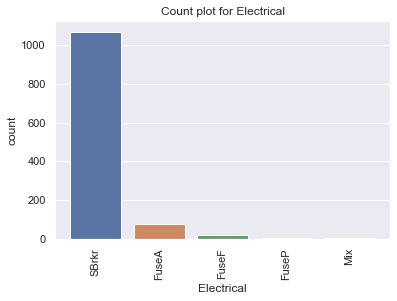

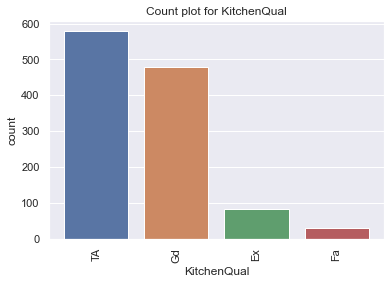

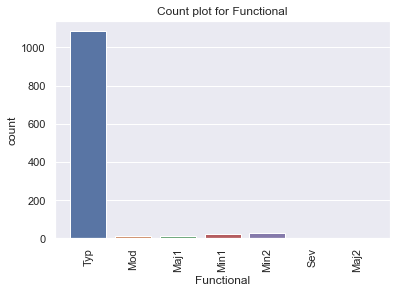

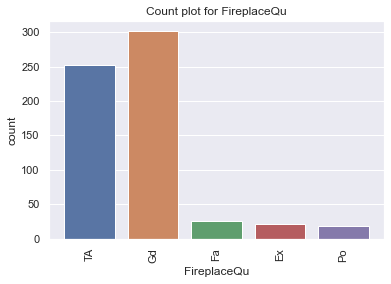

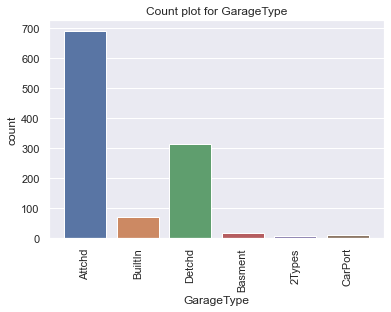

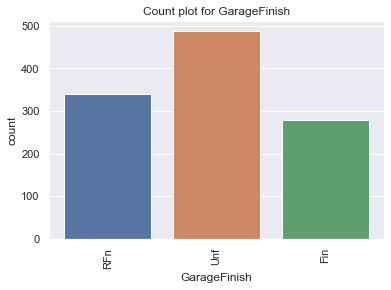

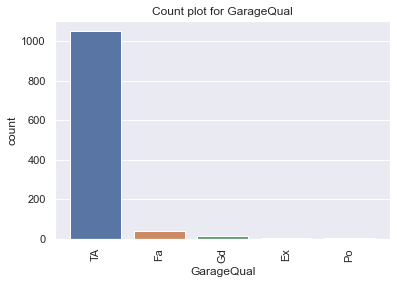

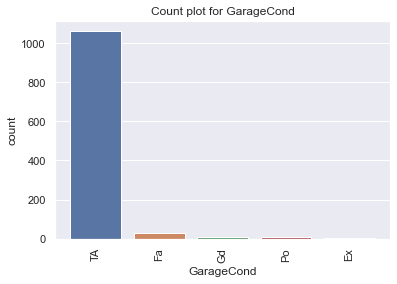

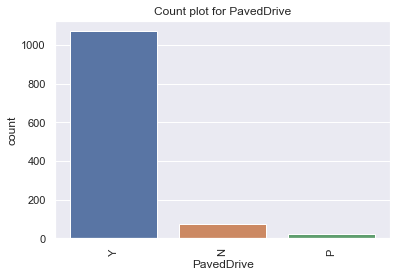

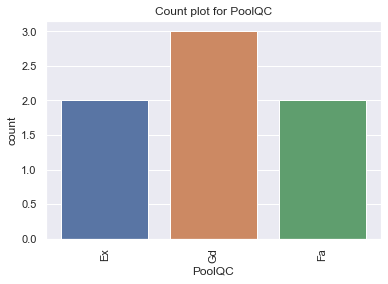

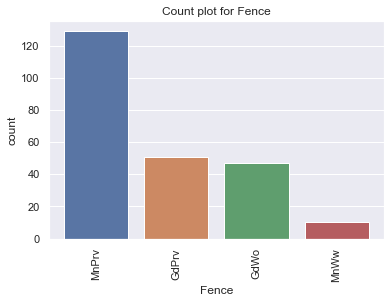

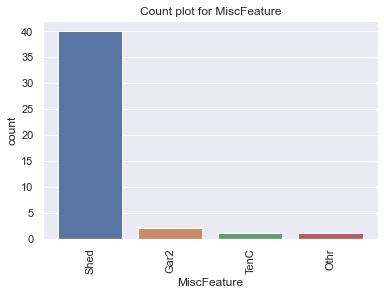

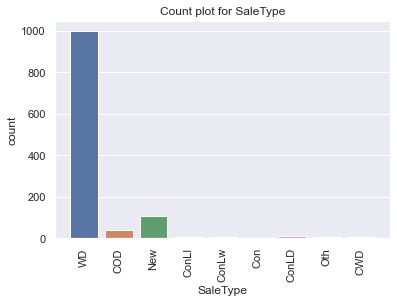

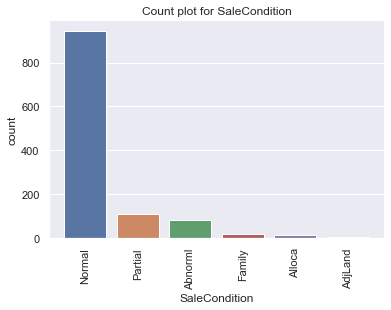

In [70]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

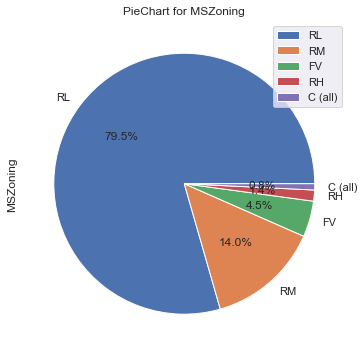

<Figure size 432x288 with 0 Axes>

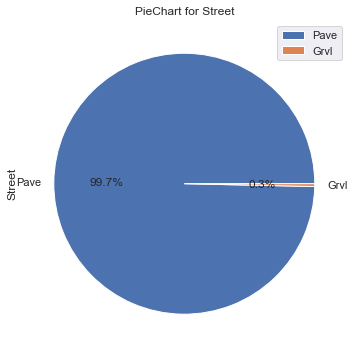

<Figure size 432x288 with 0 Axes>

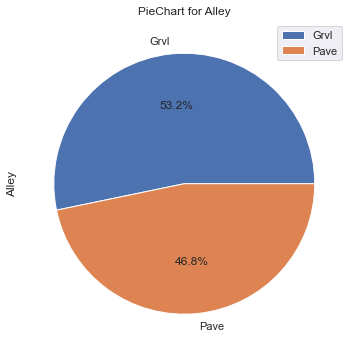

<Figure size 432x288 with 0 Axes>

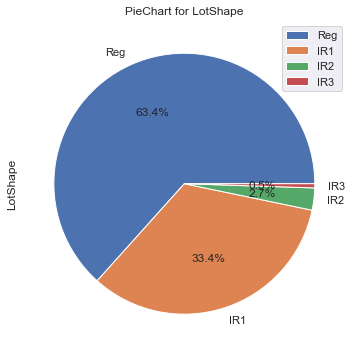

<Figure size 432x288 with 0 Axes>

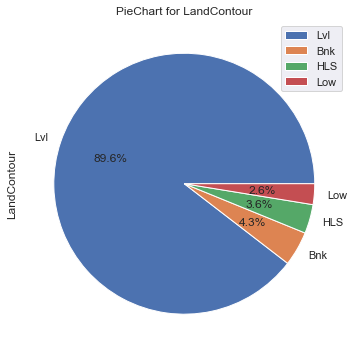

<Figure size 432x288 with 0 Axes>

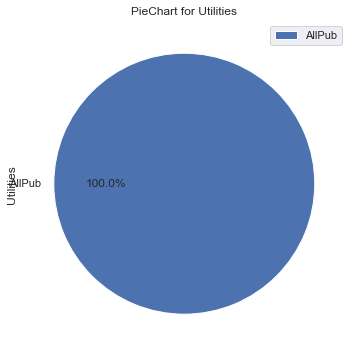

<Figure size 432x288 with 0 Axes>

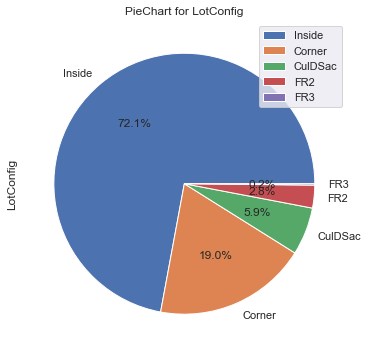

<Figure size 432x288 with 0 Axes>

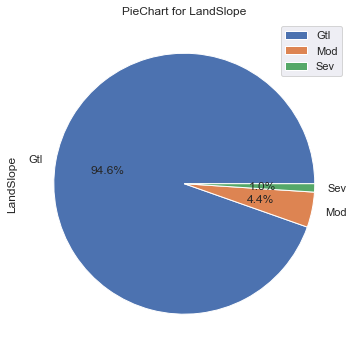

<Figure size 432x288 with 0 Axes>

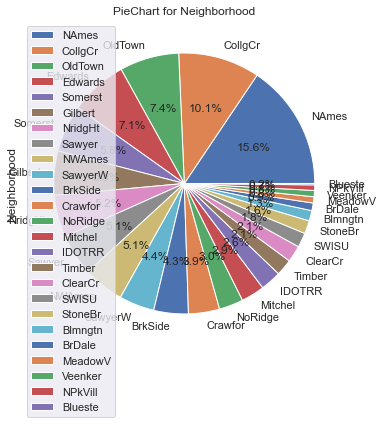

<Figure size 432x288 with 0 Axes>

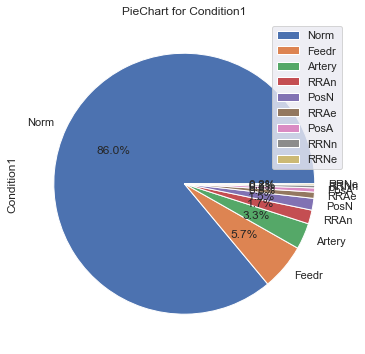

<Figure size 432x288 with 0 Axes>

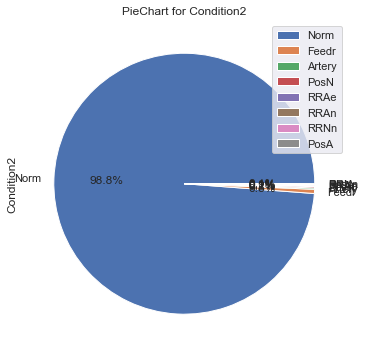

<Figure size 432x288 with 0 Axes>

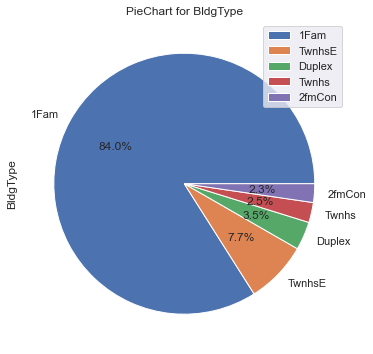

<Figure size 432x288 with 0 Axes>

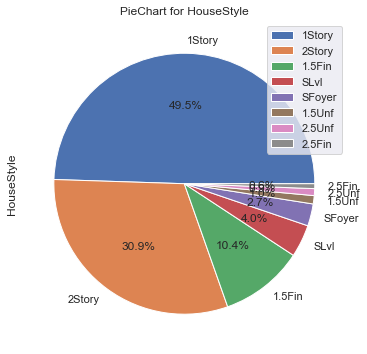

<Figure size 432x288 with 0 Axes>

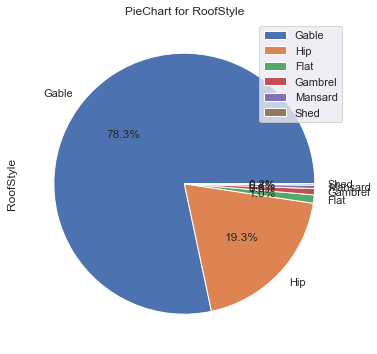

<Figure size 432x288 with 0 Axes>

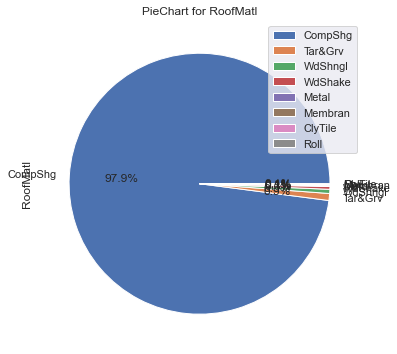

<Figure size 432x288 with 0 Axes>

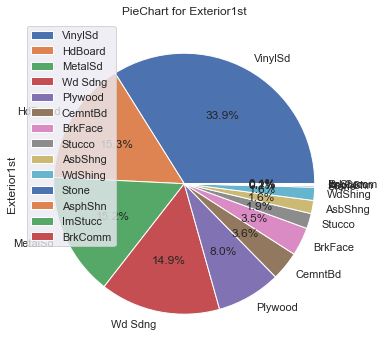

<Figure size 432x288 with 0 Axes>

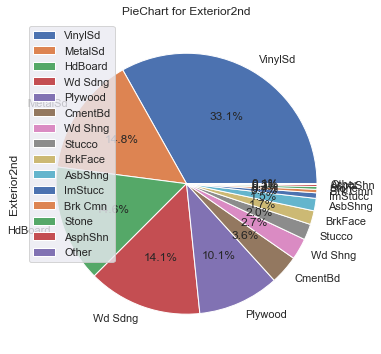

<Figure size 432x288 with 0 Axes>

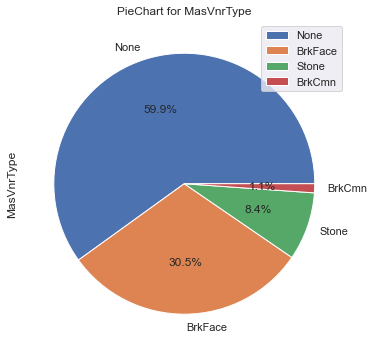

<Figure size 432x288 with 0 Axes>

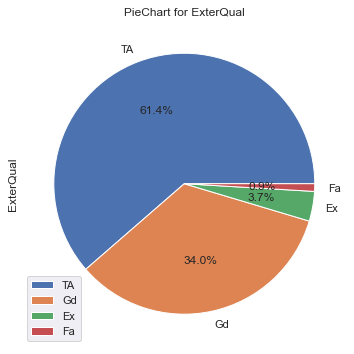

<Figure size 432x288 with 0 Axes>

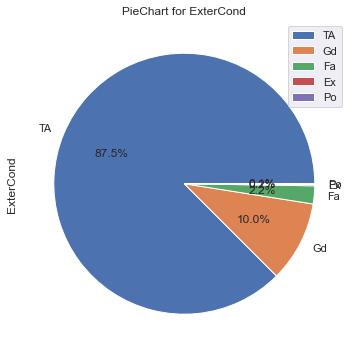

<Figure size 432x288 with 0 Axes>

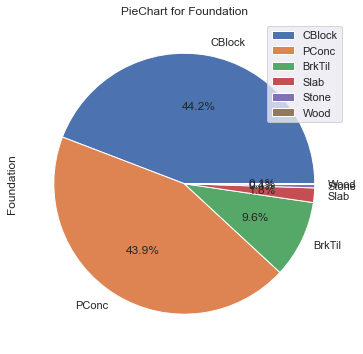

<Figure size 432x288 with 0 Axes>

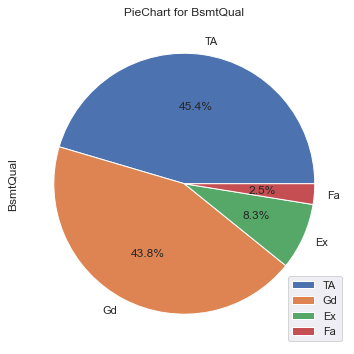

<Figure size 432x288 with 0 Axes>

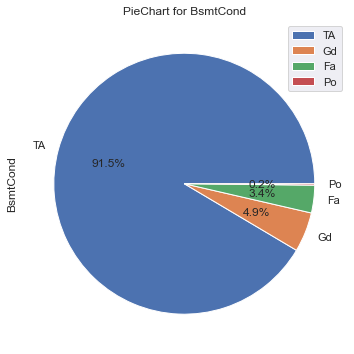

<Figure size 432x288 with 0 Axes>

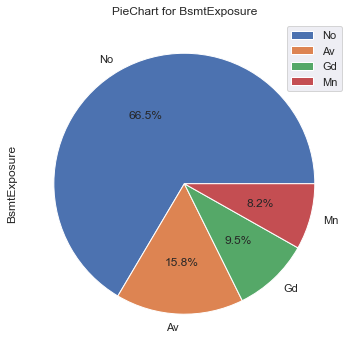

<Figure size 432x288 with 0 Axes>

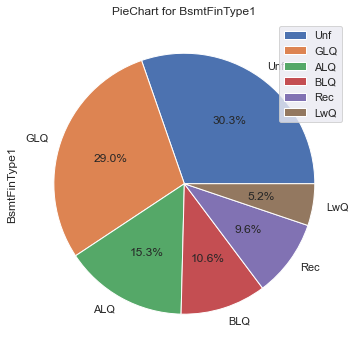

<Figure size 432x288 with 0 Axes>

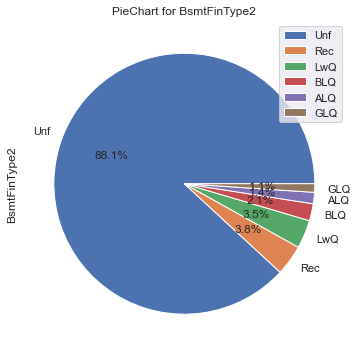

<Figure size 432x288 with 0 Axes>

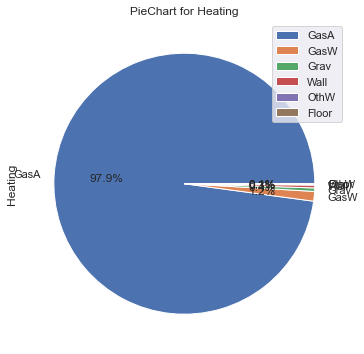

<Figure size 432x288 with 0 Axes>

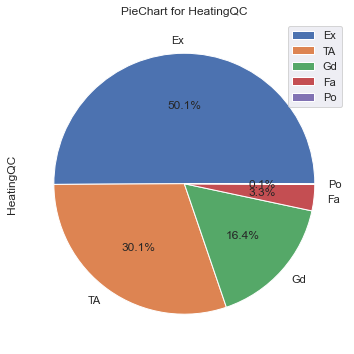

<Figure size 432x288 with 0 Axes>

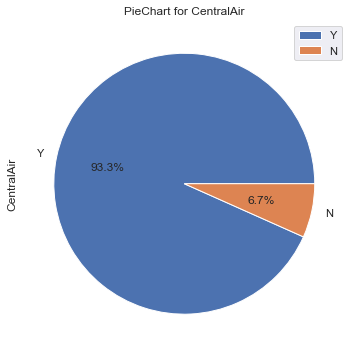

<Figure size 432x288 with 0 Axes>

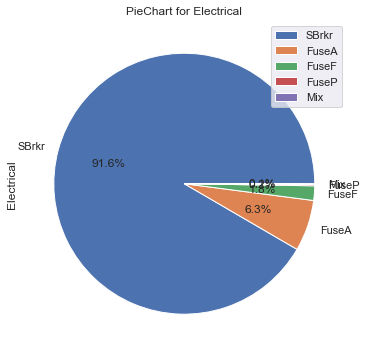

<Figure size 432x288 with 0 Axes>

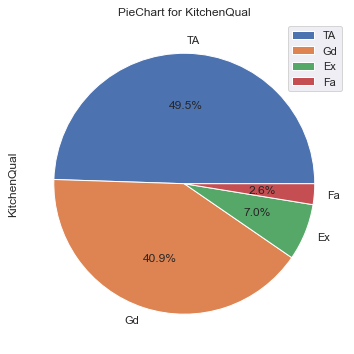

<Figure size 432x288 with 0 Axes>

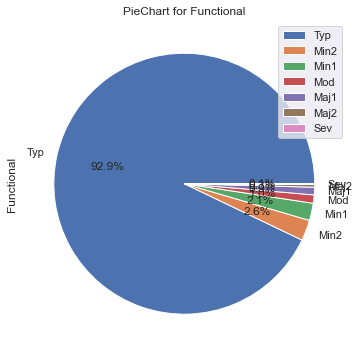

<Figure size 432x288 with 0 Axes>

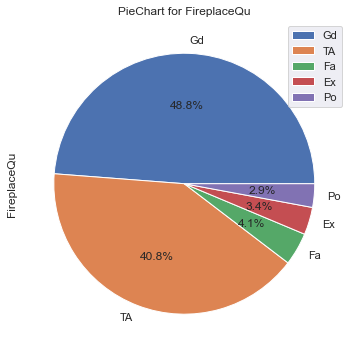

<Figure size 432x288 with 0 Axes>

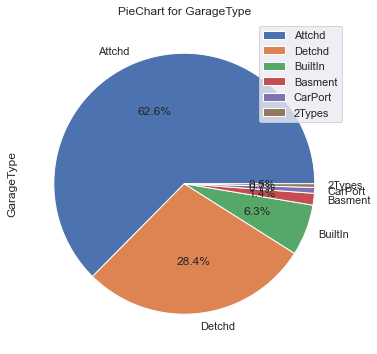

<Figure size 432x288 with 0 Axes>

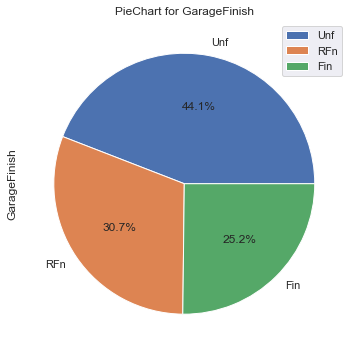

<Figure size 432x288 with 0 Axes>

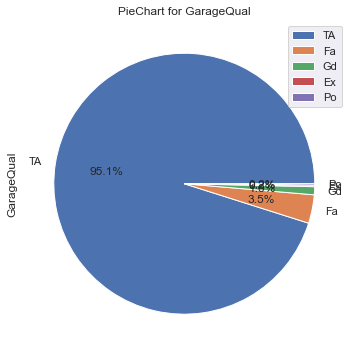

<Figure size 432x288 with 0 Axes>

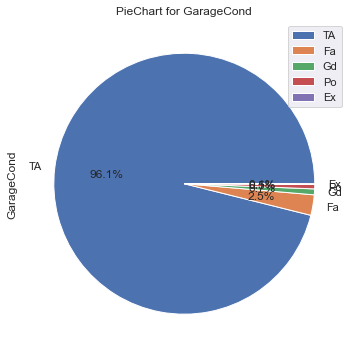

<Figure size 432x288 with 0 Axes>

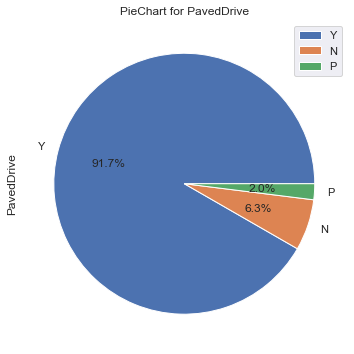

<Figure size 432x288 with 0 Axes>

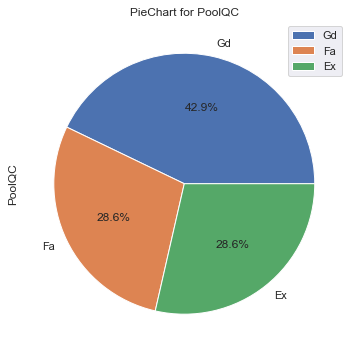

<Figure size 432x288 with 0 Axes>

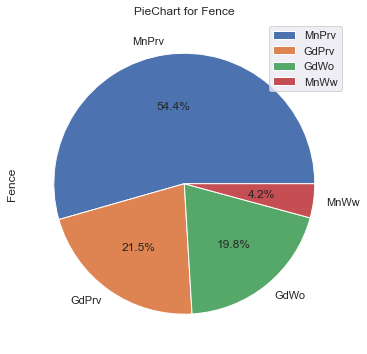

<Figure size 432x288 with 0 Axes>

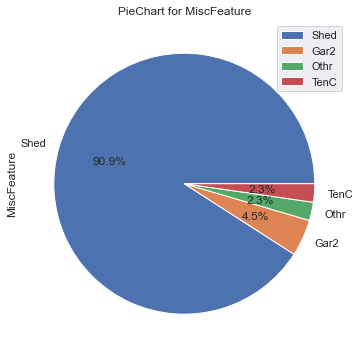

<Figure size 432x288 with 0 Axes>

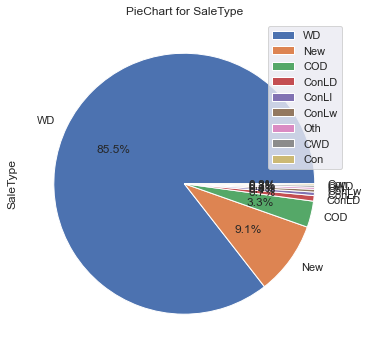

<Figure size 432x288 with 0 Axes>

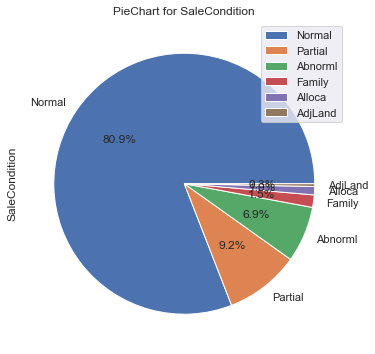

In [71]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

In [72]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Id
1168
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64


MSSubClass
15
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


LotFrontage
106
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64


LotArea
892
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64


OverallQual
10
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


OverallCond
9
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1  

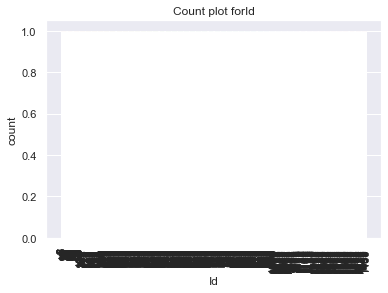

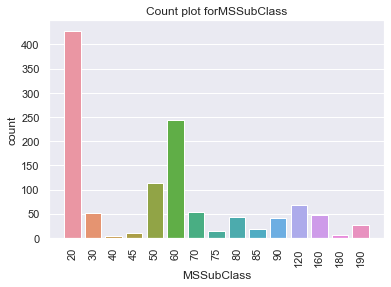

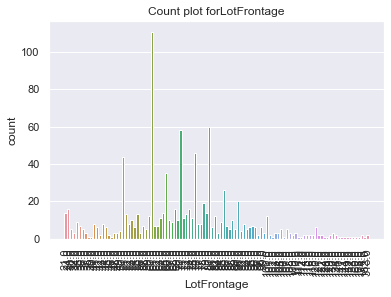

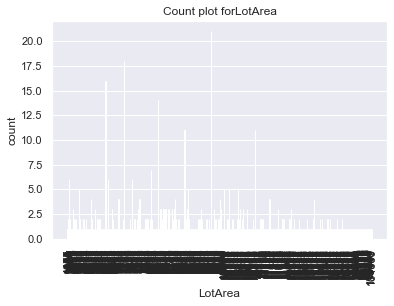

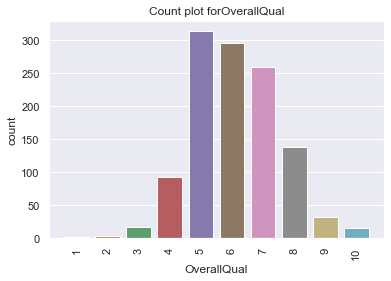

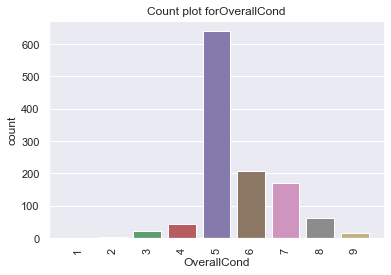

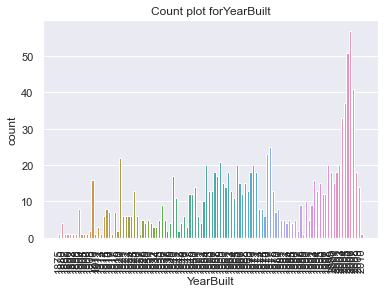

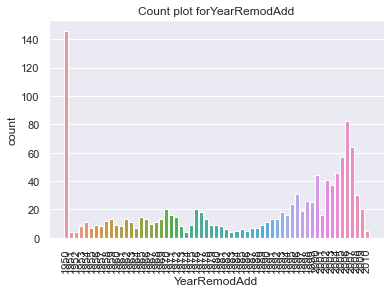

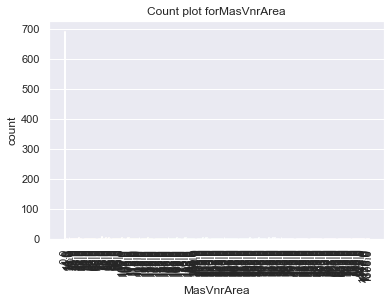

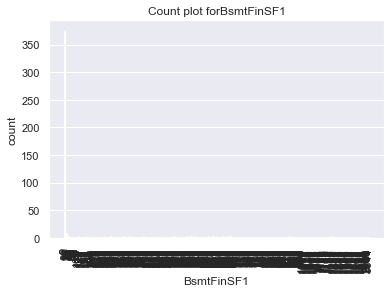

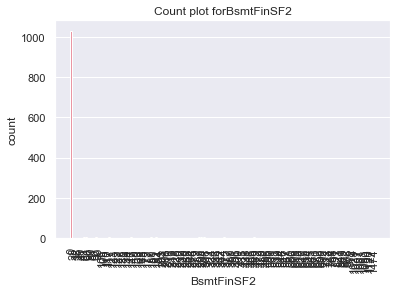

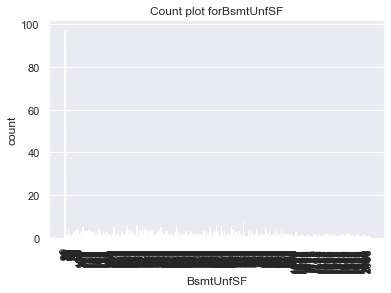

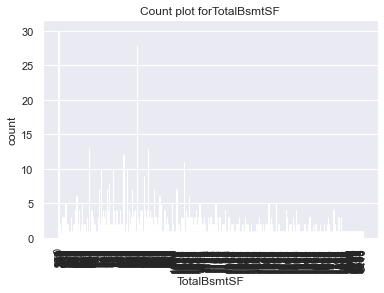

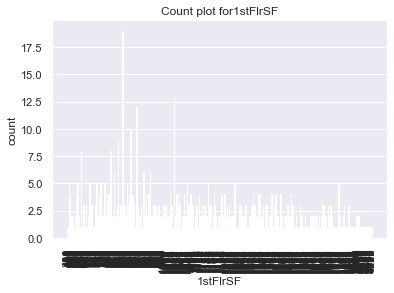

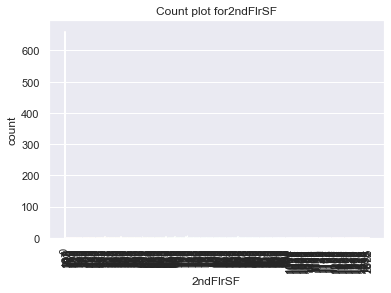

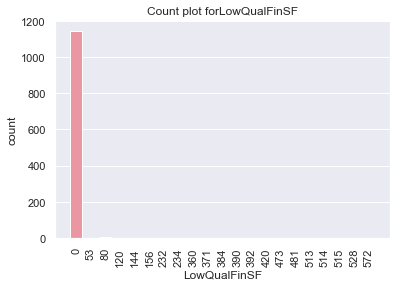

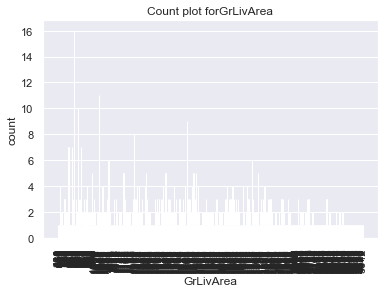

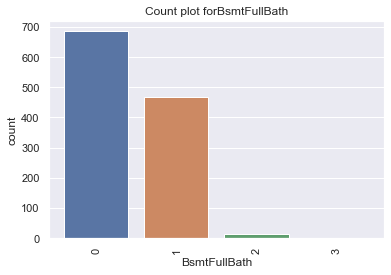

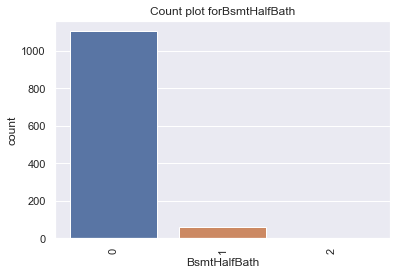

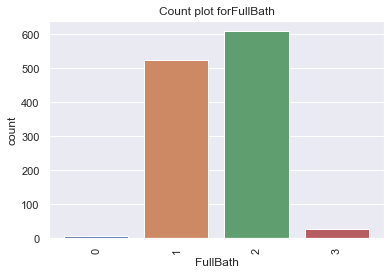

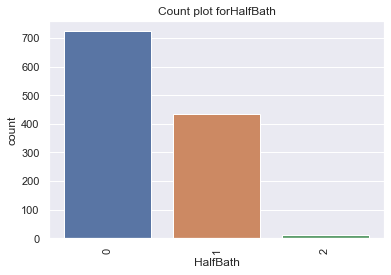

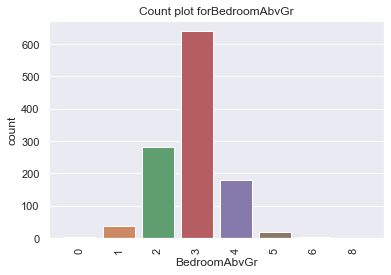

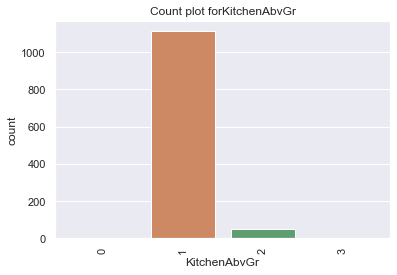

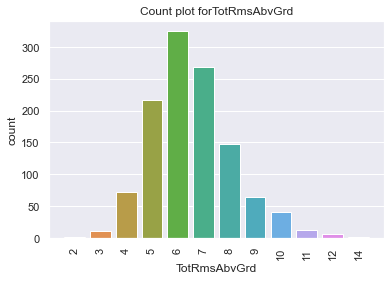

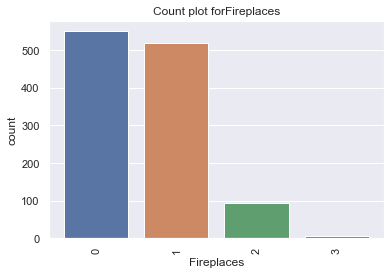

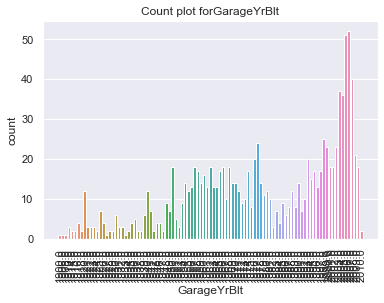

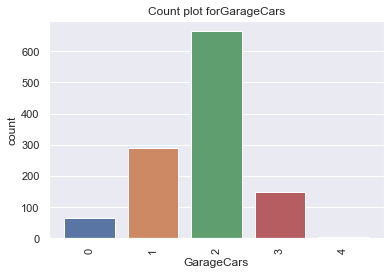

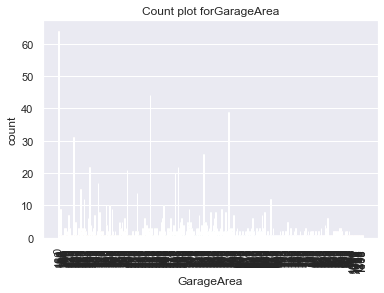

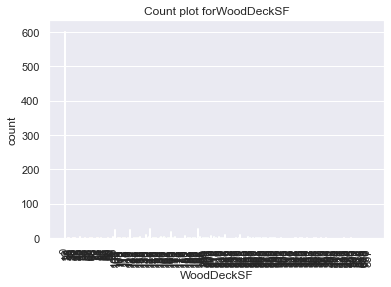

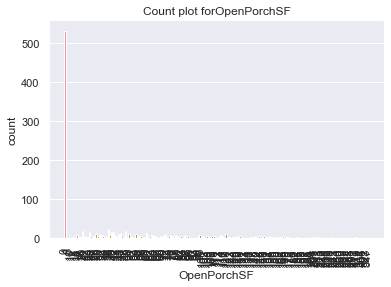

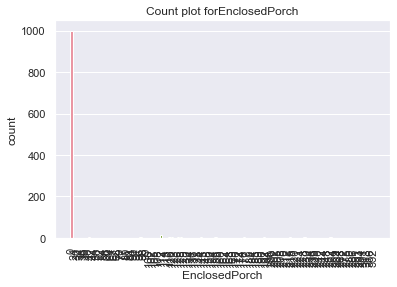

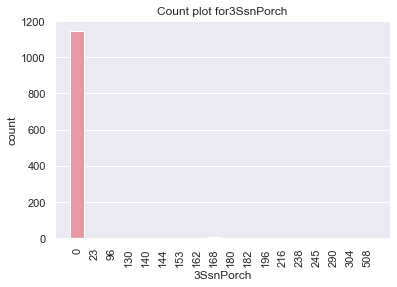

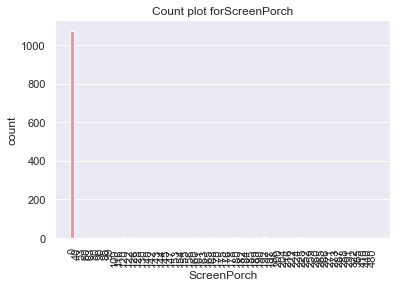

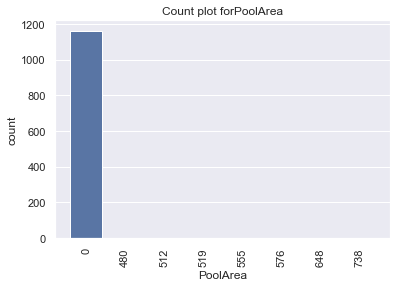

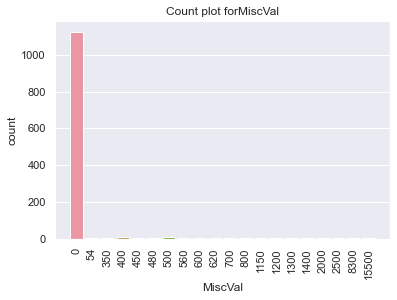

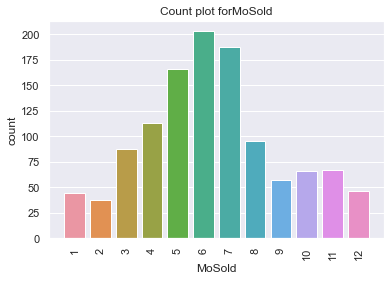

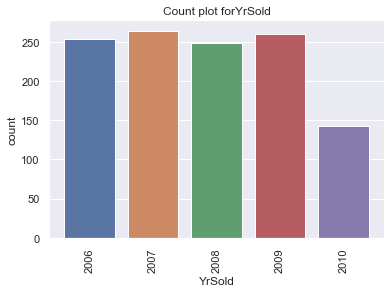

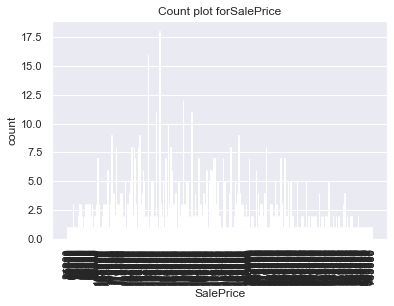

In [73]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

Id


<Figure size 432x288 with 0 Axes>

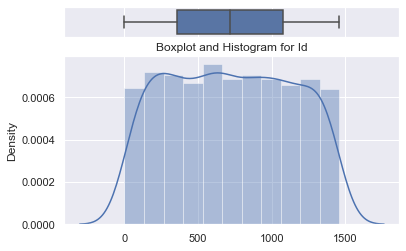

MSSubClass


<Figure size 432x288 with 0 Axes>

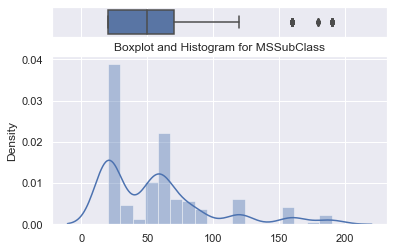

LotFrontage


<Figure size 432x288 with 0 Axes>

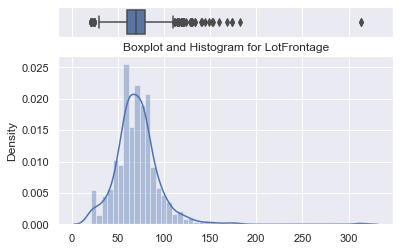

LotArea


<Figure size 432x288 with 0 Axes>

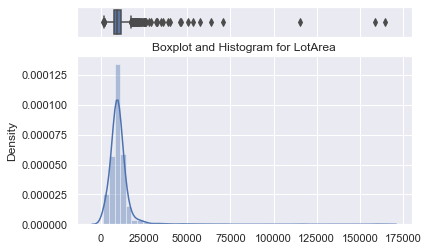

OverallQual


<Figure size 432x288 with 0 Axes>

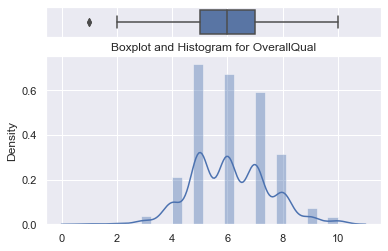

OverallCond


<Figure size 432x288 with 0 Axes>

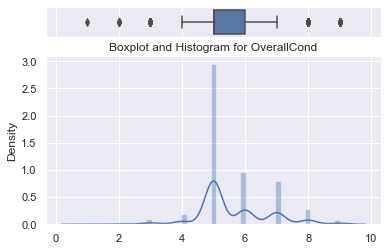

YearBuilt


<Figure size 432x288 with 0 Axes>

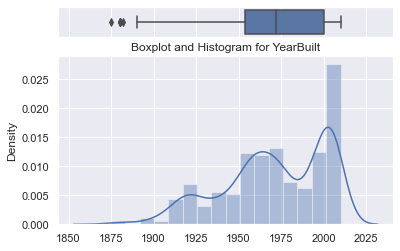

YearRemodAdd


<Figure size 432x288 with 0 Axes>

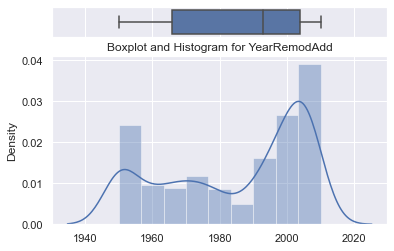

MasVnrArea


<Figure size 432x288 with 0 Axes>

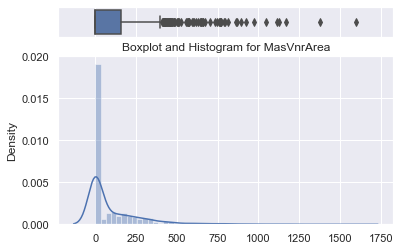

BsmtFinSF1


<Figure size 432x288 with 0 Axes>

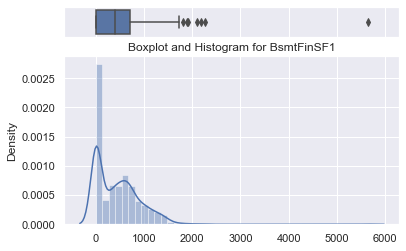

BsmtFinSF2


<Figure size 432x288 with 0 Axes>

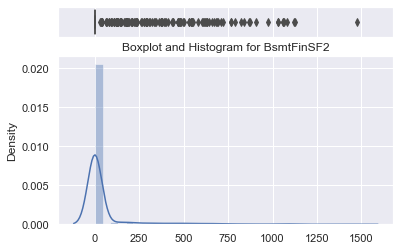

BsmtUnfSF


<Figure size 432x288 with 0 Axes>

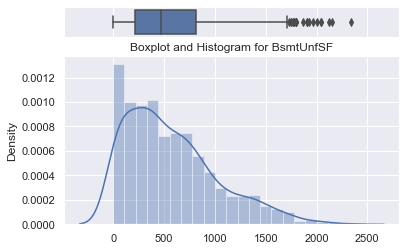

TotalBsmtSF


<Figure size 432x288 with 0 Axes>

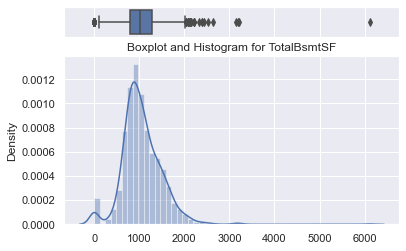

1stFlrSF


<Figure size 432x288 with 0 Axes>

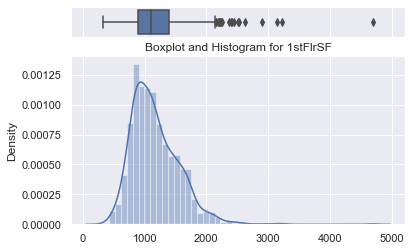

2ndFlrSF


<Figure size 432x288 with 0 Axes>

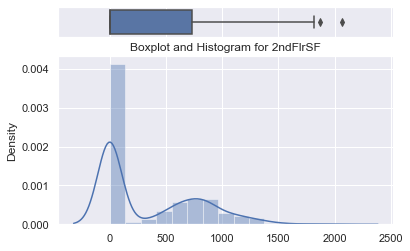

LowQualFinSF


<Figure size 432x288 with 0 Axes>

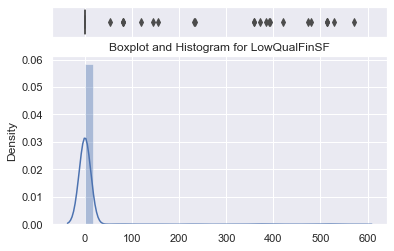

GrLivArea


<Figure size 432x288 with 0 Axes>

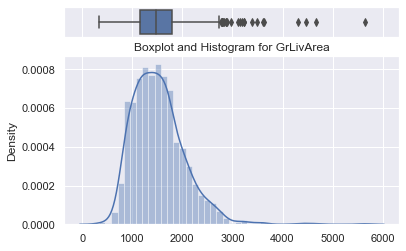

BsmtFullBath


<Figure size 432x288 with 0 Axes>

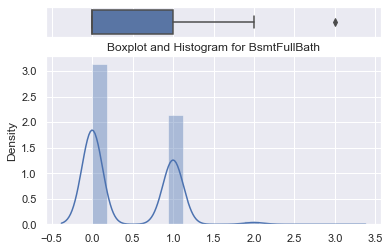

BsmtHalfBath


<Figure size 432x288 with 0 Axes>

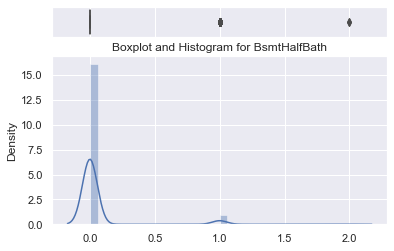

FullBath


<Figure size 432x288 with 0 Axes>

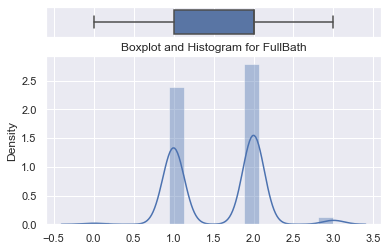

HalfBath


<Figure size 432x288 with 0 Axes>

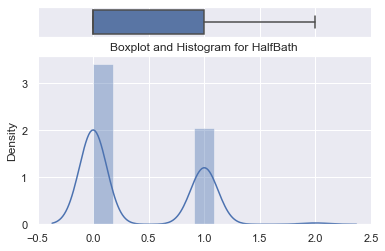

BedroomAbvGr


<Figure size 432x288 with 0 Axes>

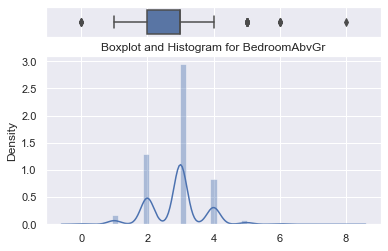

KitchenAbvGr


<Figure size 432x288 with 0 Axes>

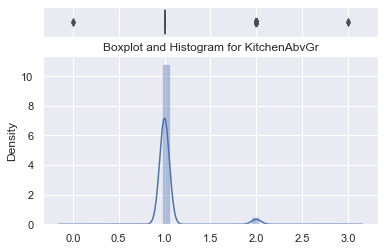

TotRmsAbvGrd


<Figure size 432x288 with 0 Axes>

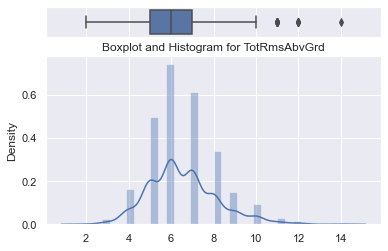

Fireplaces


<Figure size 432x288 with 0 Axes>

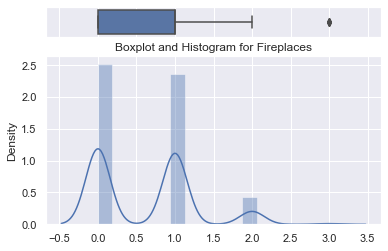

GarageYrBlt


<Figure size 432x288 with 0 Axes>

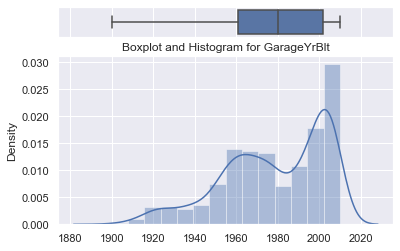

GarageCars


<Figure size 432x288 with 0 Axes>

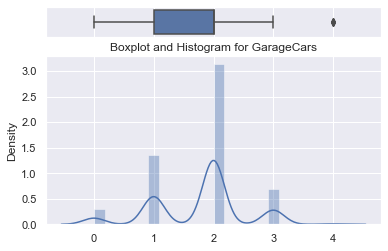

GarageArea


<Figure size 432x288 with 0 Axes>

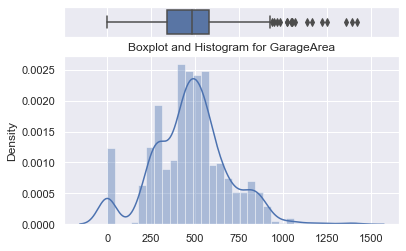

WoodDeckSF


<Figure size 432x288 with 0 Axes>

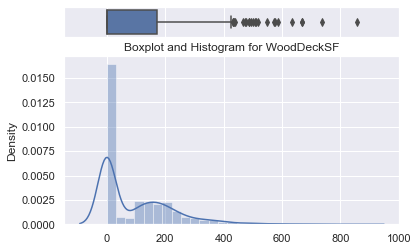

OpenPorchSF


<Figure size 432x288 with 0 Axes>

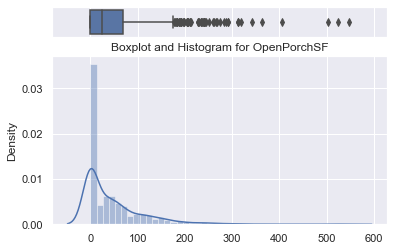

EnclosedPorch


<Figure size 432x288 with 0 Axes>

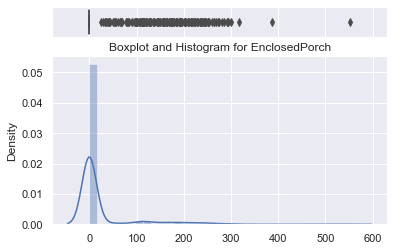

3SsnPorch


<Figure size 432x288 with 0 Axes>

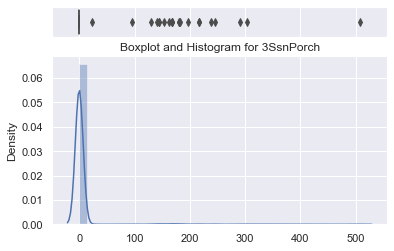

ScreenPorch


<Figure size 432x288 with 0 Axes>

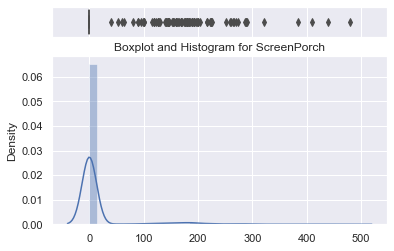

PoolArea


<Figure size 432x288 with 0 Axes>

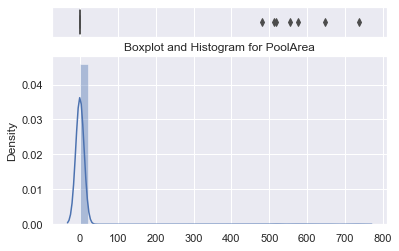

MiscVal


<Figure size 432x288 with 0 Axes>

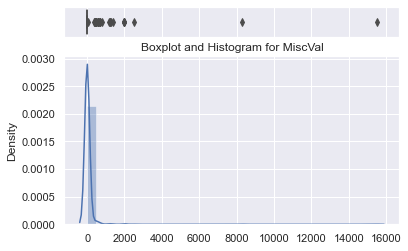

MoSold


<Figure size 432x288 with 0 Axes>

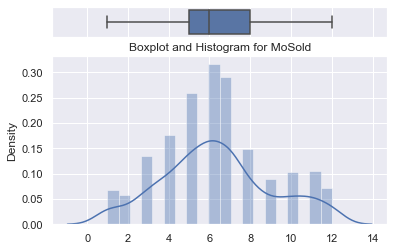

YrSold


<Figure size 432x288 with 0 Axes>

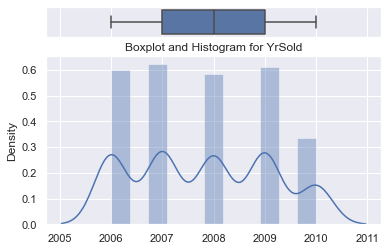

SalePrice


<Figure size 432x288 with 0 Axes>

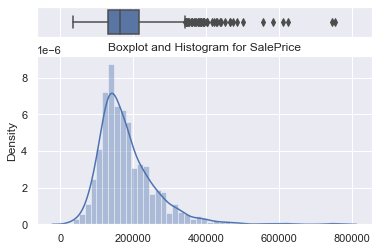

In [74]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [75]:
pd.DataFrame(df.skew(axis=0,skipna=True))

0
Id              0.026526
MSSubClass      1.422019
LotFrontage     2.450241
LotArea        10.659285
OverallQual     0.175082
OverallCond     0.580714
YearBuilt      -0.579204
YearRemodAdd   -0.495864
MasVnrArea      2.826173
BsmtFinSF1      1.871606
BsmtFinSF2      4.365829
BsmtUnfSF       0.909057
TotalBsmtSF     1.744591
1stFlrSF        1.513707
2ndFlrSF        0.823479
LowQualFinSF    8.666142
GrLivArea       1.449952
BsmtFullBath    0.627106
BsmtHalfBath    4.264403
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr    0.243855
KitchenAbvGr    4.365259
TotRmsAbvGrd    0.644657
Fireplaces      0.671966
GarageYrBlt    -0.644564
GarageCars     -0.358556
GarageArea      0.189665
WoodDeckSF      1.504929
OpenPorchSF     2.410840
EnclosedPorch   3.043610
3SsnPorch       9.770611
ScreenPorch     4.105741
PoolArea       13.243711
MiscVal        23.065943
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878

In [77]:
feautres_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [78]:
feautres_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [79]:
for features in feautres_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

LotFrontage 0.1832 %
Alley 0.9341 %
MasVnrType 0.006 %
MasVnrArea 0.006 %
BsmtQual 0.0257 %
BsmtCond 0.0257 %
BsmtExposure 0.0265 %
BsmtFinType1 0.0257 %
BsmtFinType2 0.0265 %
FireplaceQu 0.4717 %
GarageType 0.0548 %
GarageYrBlt 0.0548 %
GarageFinish 0.0548 %
GarageQual 0.0548 %
GarageCond 0.0548 %
PoolQC 0.994 %
Fence 0.7971 %
MiscFeature 0.9623 %


In [80]:
more_than_50_percent_misssing_value_features = [features for features in feautres_na if (np.round(df[features].isnull().mean(),4)) > 0.5]

In [81]:
more_than_50_percent_misssing_value_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

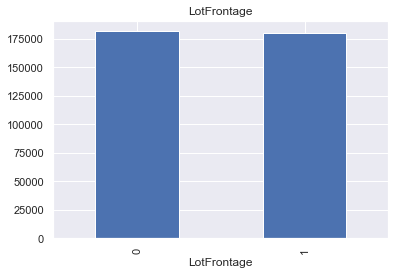

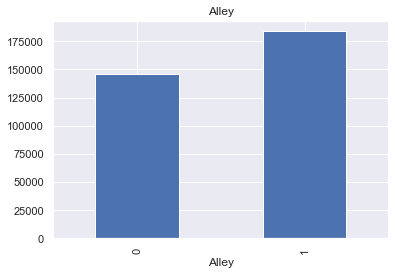

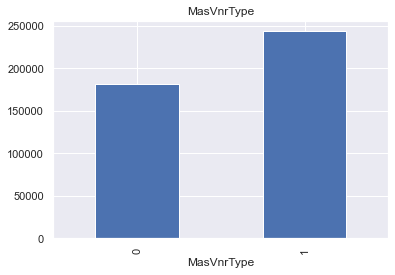

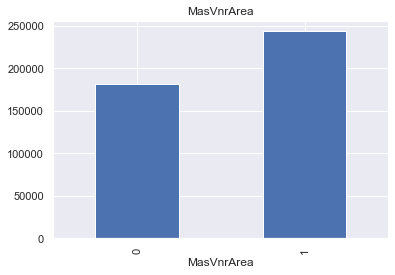

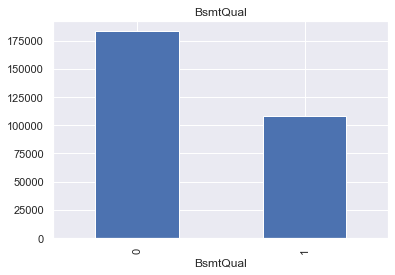

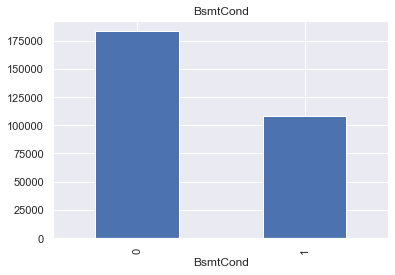

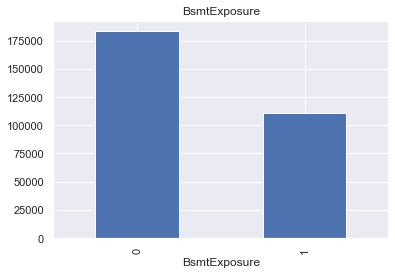

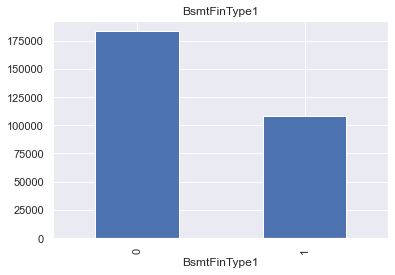

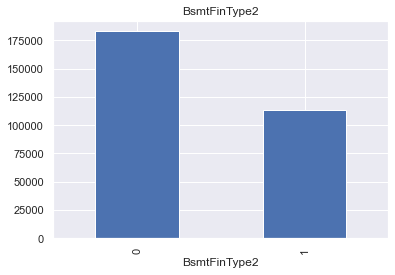

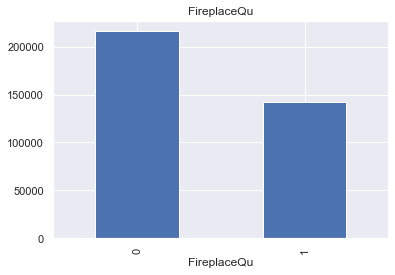

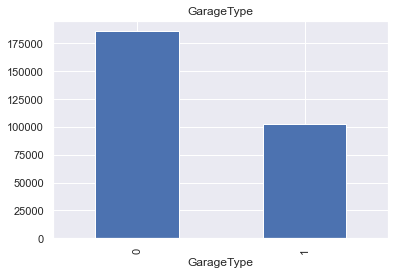

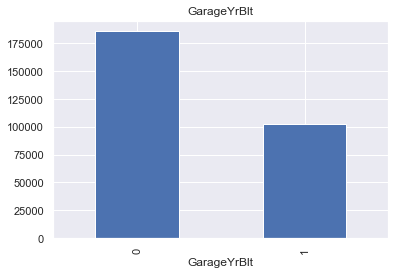

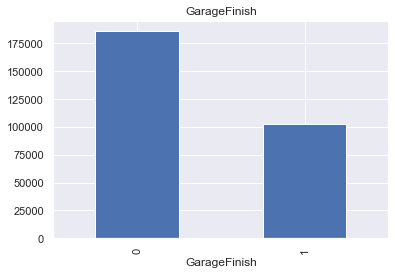

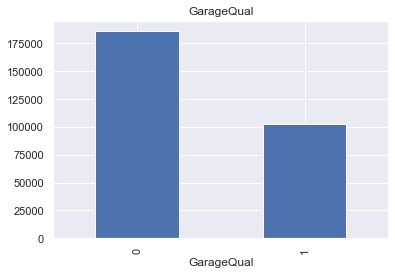

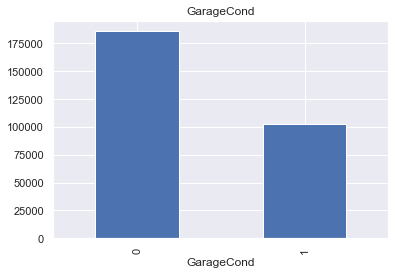

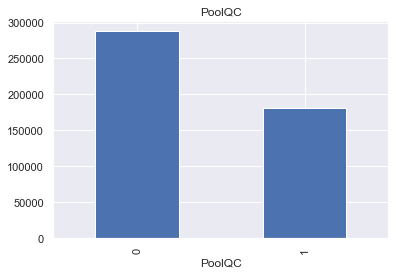

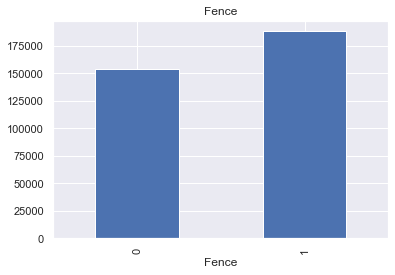

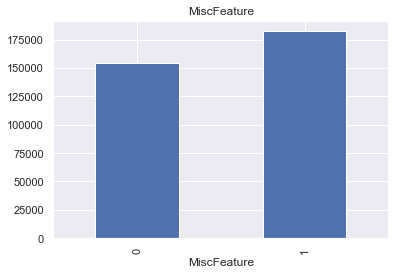

In [82]:
for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [84]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [85]:
df[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

In [86]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

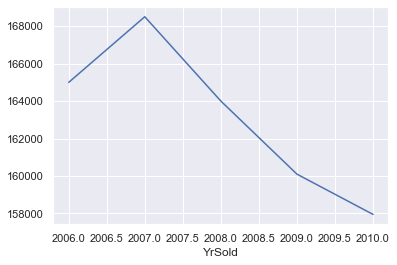

In [87]:
df.groupby('YrSold')['SalePrice'].median().plot()

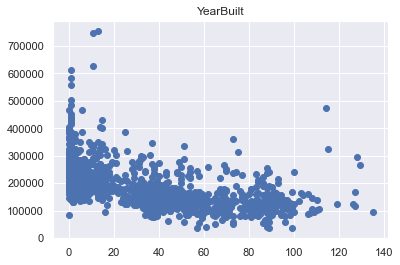

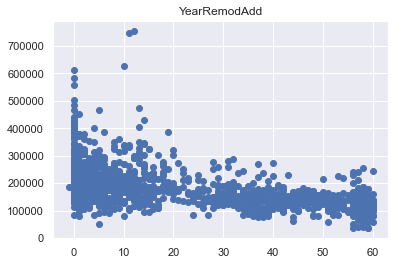

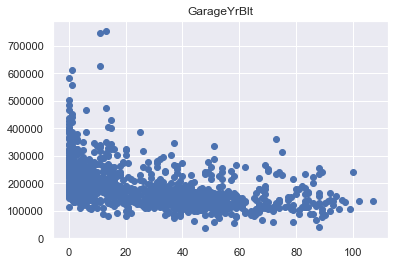

In [88]:
for feature in year_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [89]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [90]:
df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

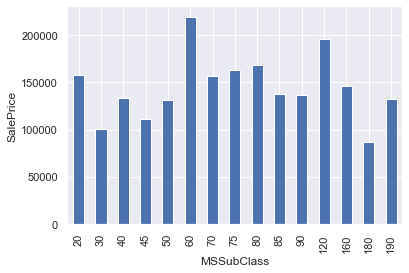

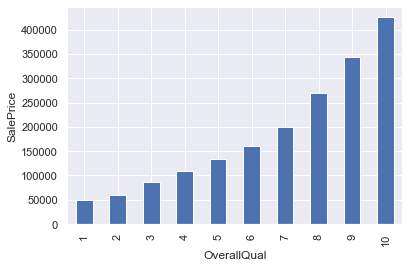

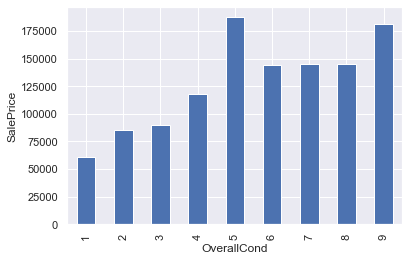

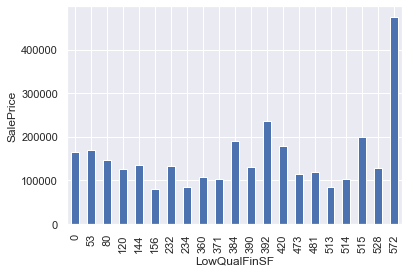

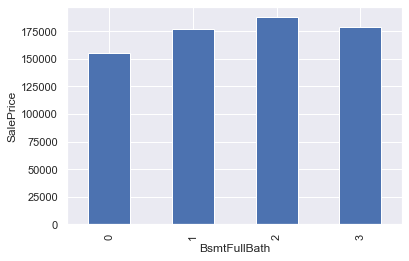

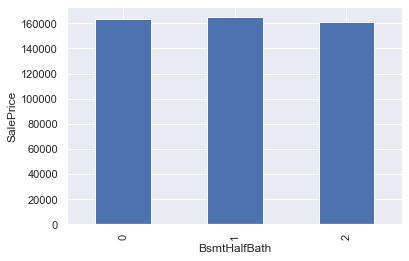

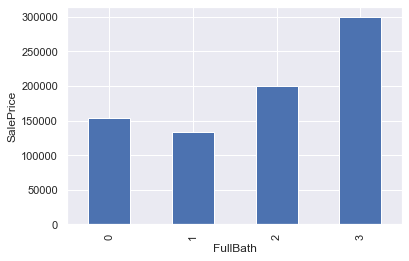

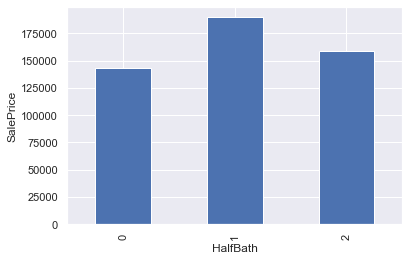

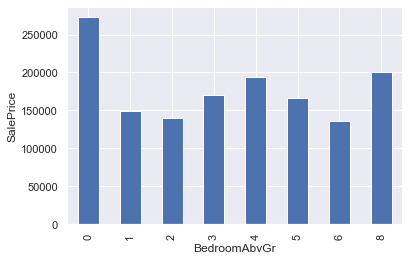

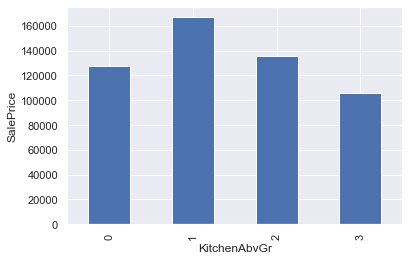

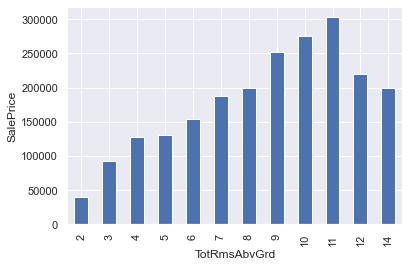

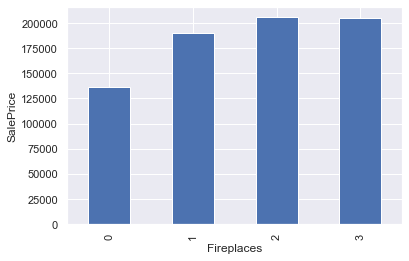

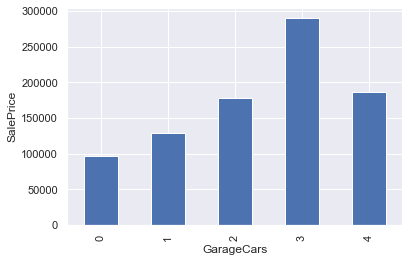

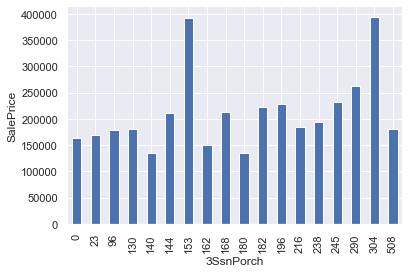

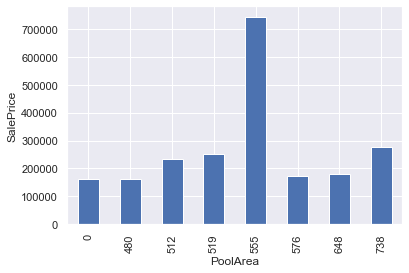

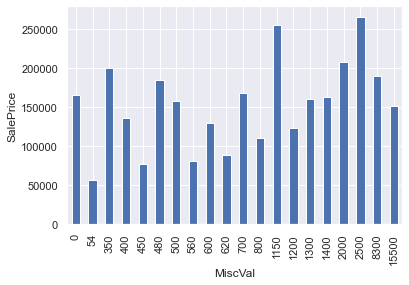

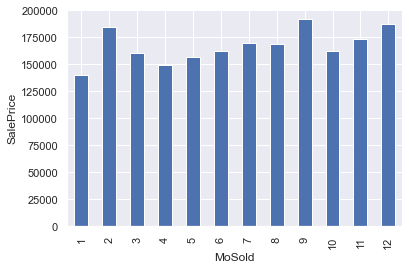

In [91]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [92]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

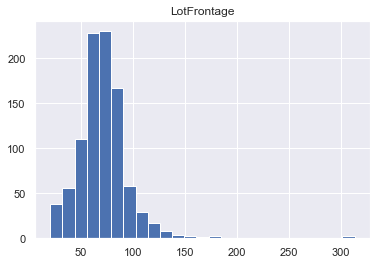

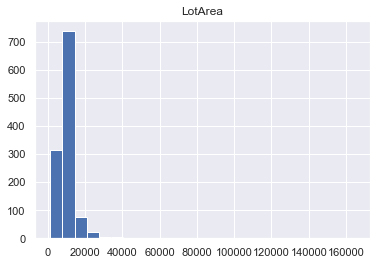

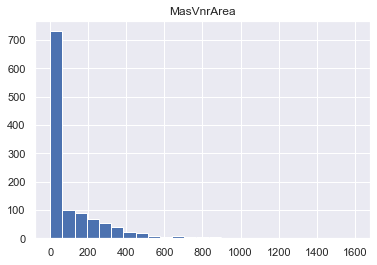

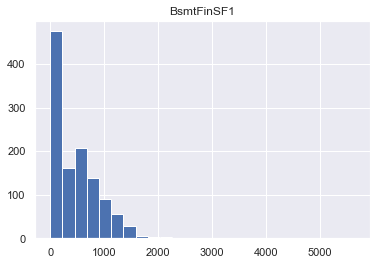

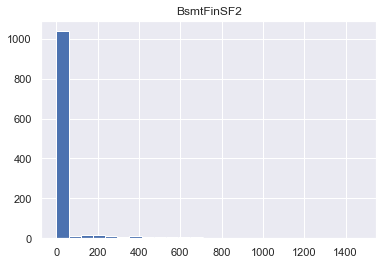

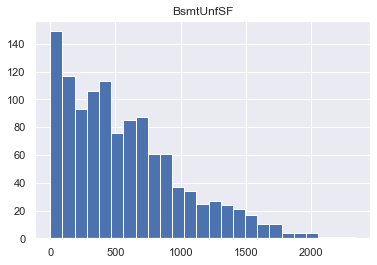

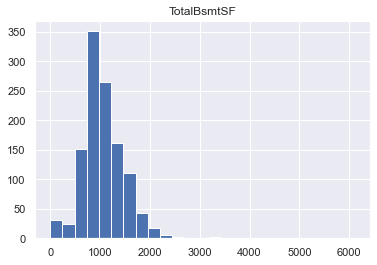

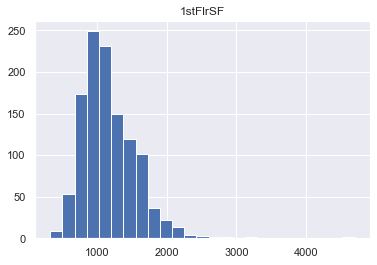

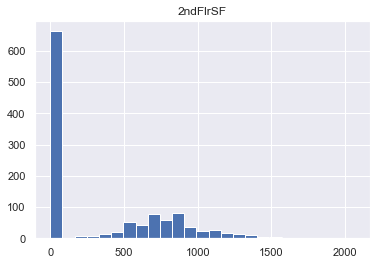

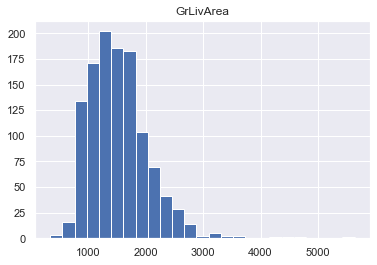

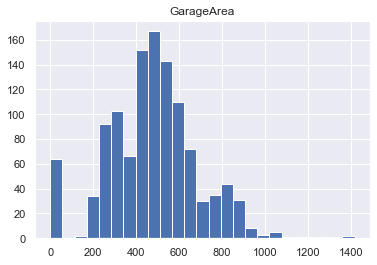

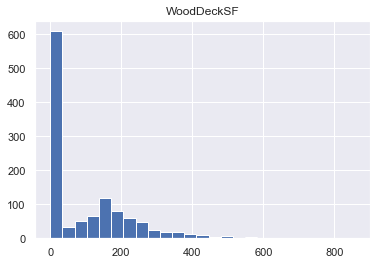

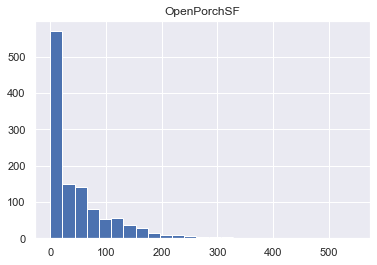

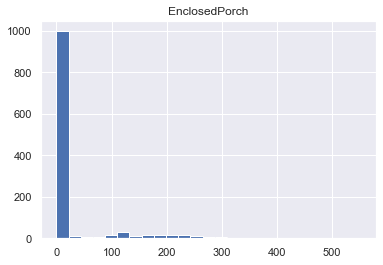

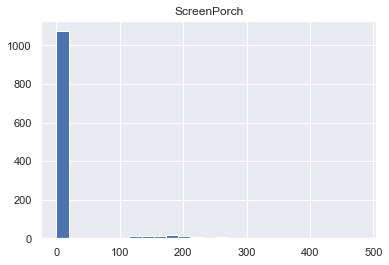

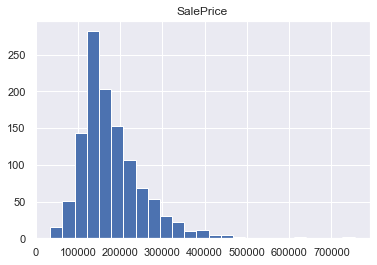

In [93]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

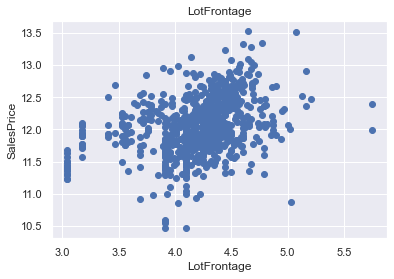

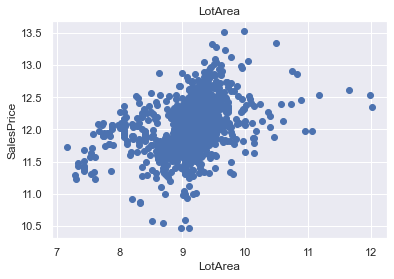

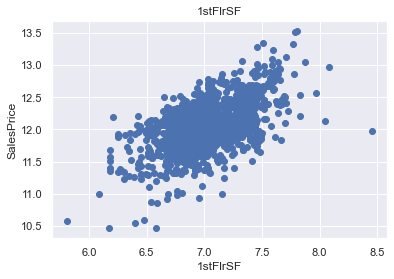

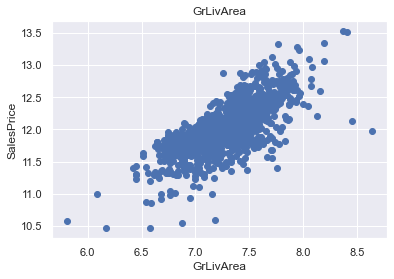

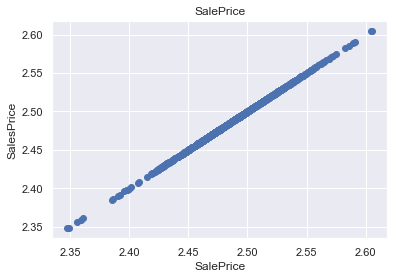

In [94]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

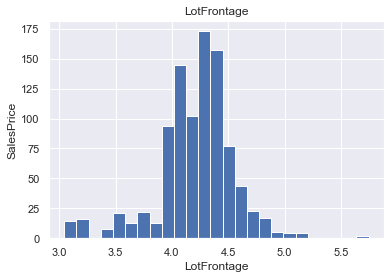

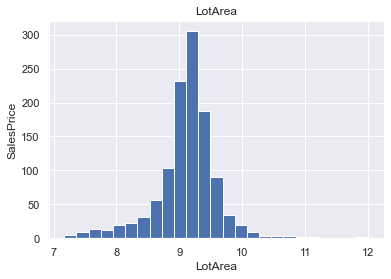

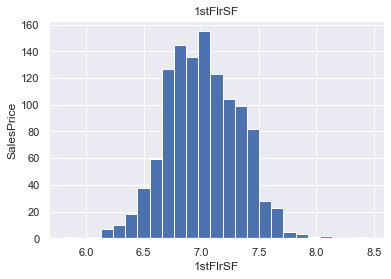

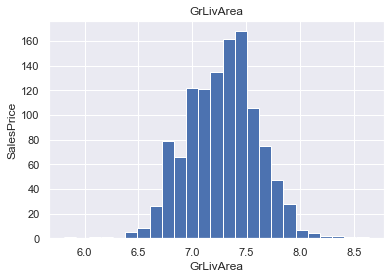

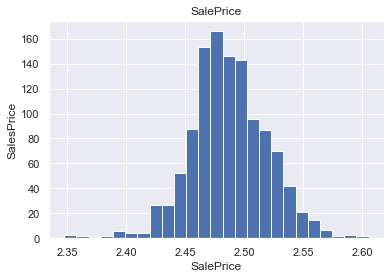

In [95]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [96]:
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [97]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 1
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 14
Distinct categories for Exterior2nd  are 15
Distinct categories for MasVnrType  are 5
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

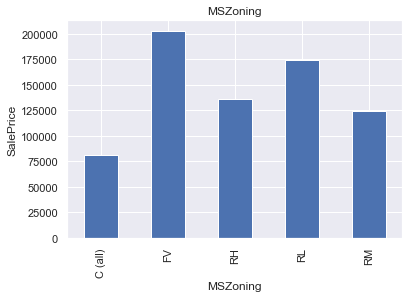

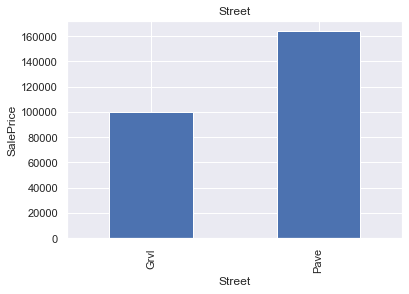

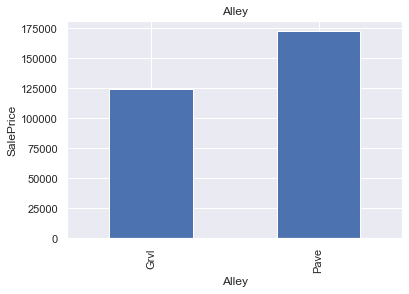

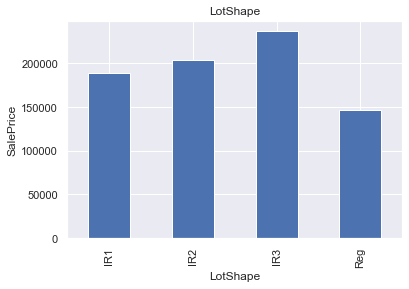

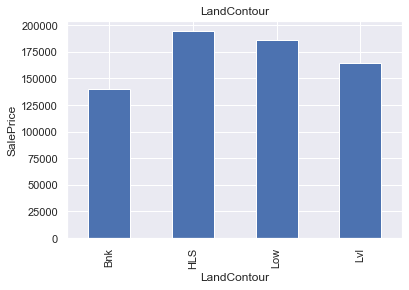

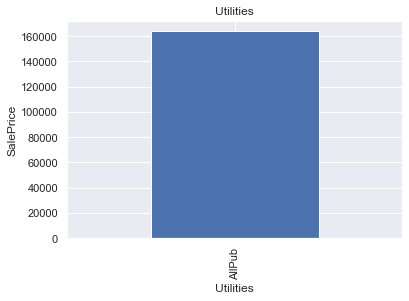

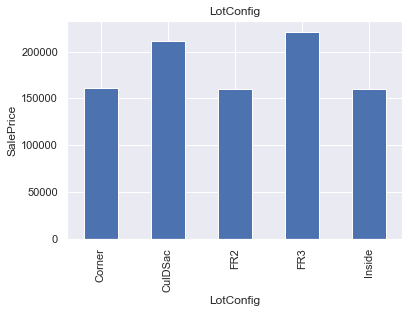

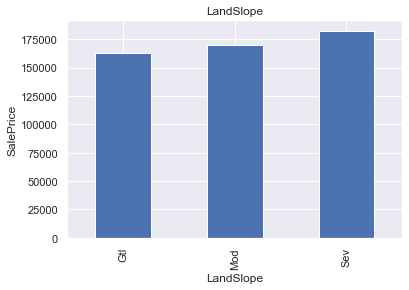

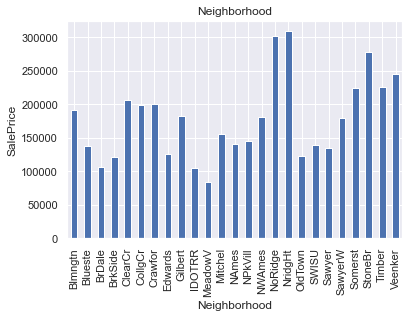

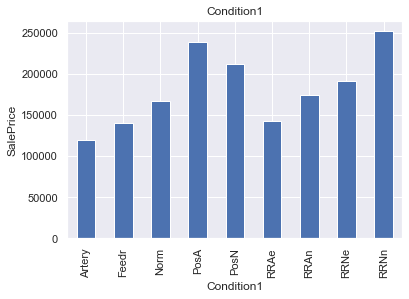

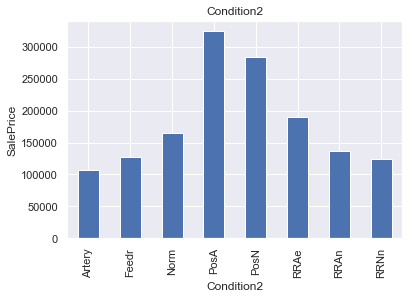

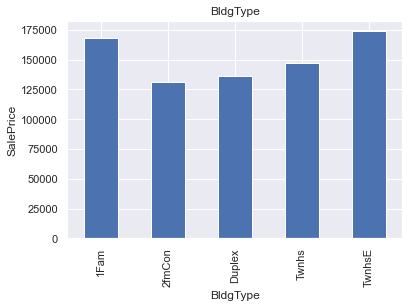

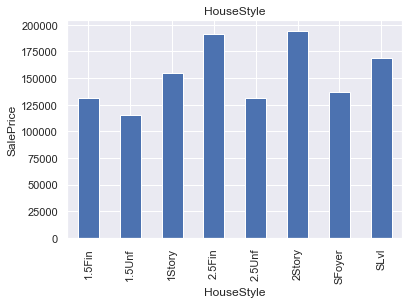

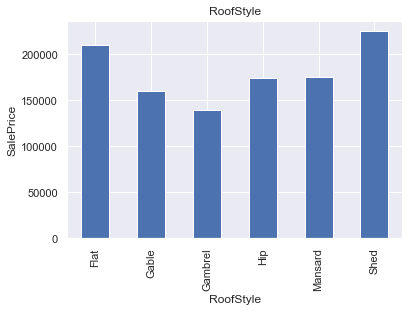

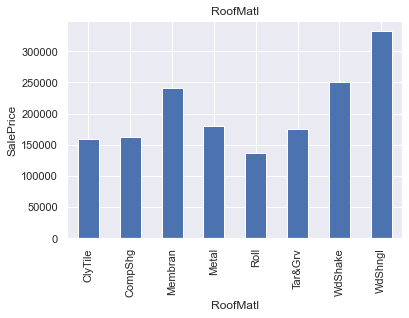

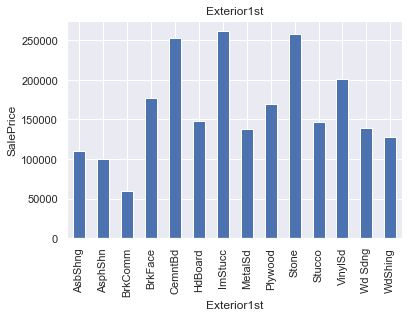

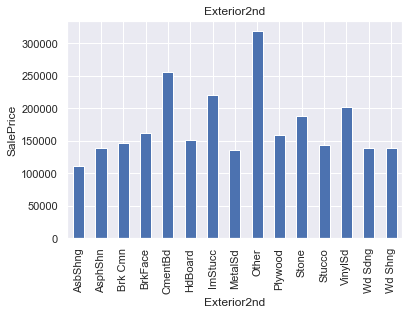

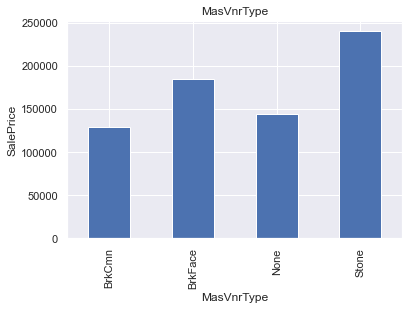

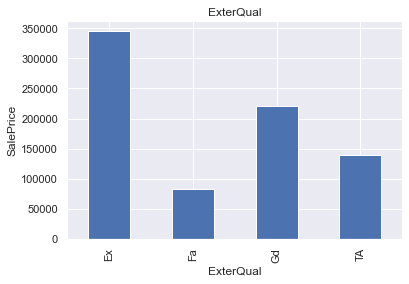

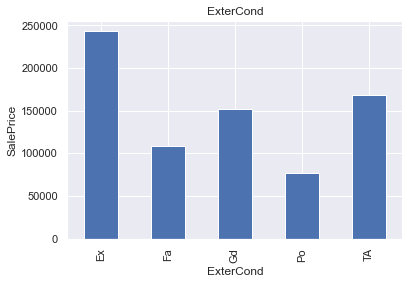

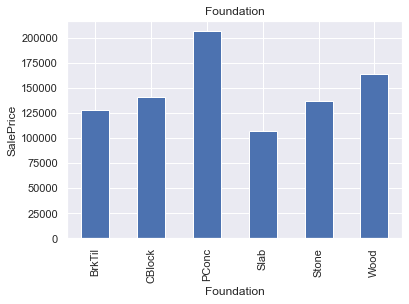

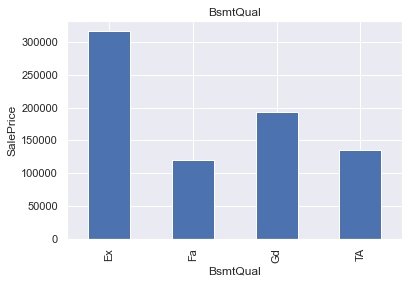

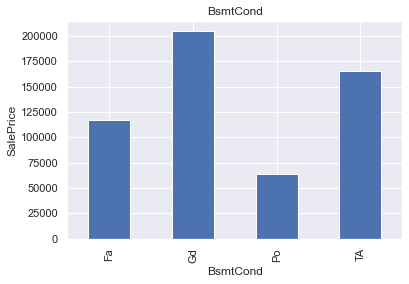

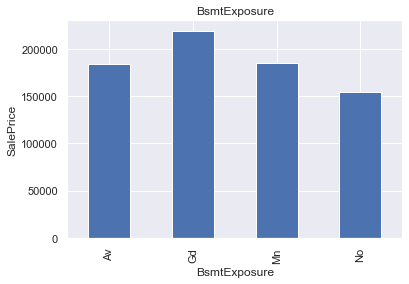

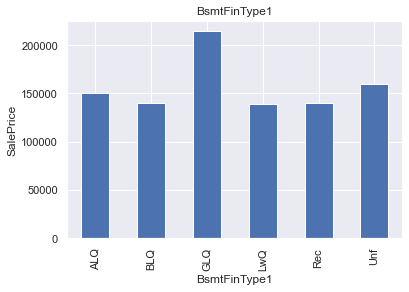

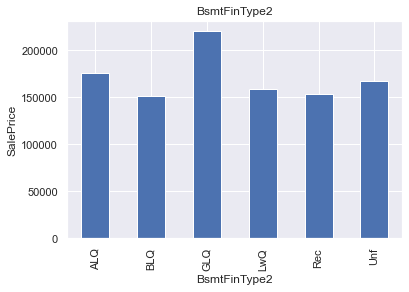

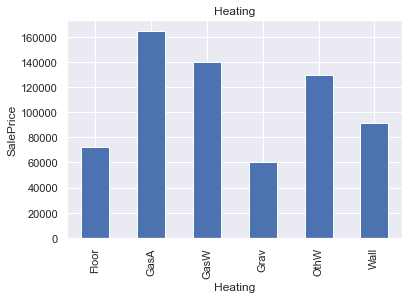

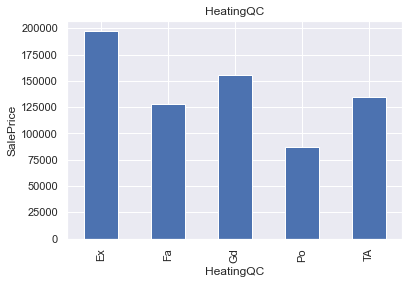

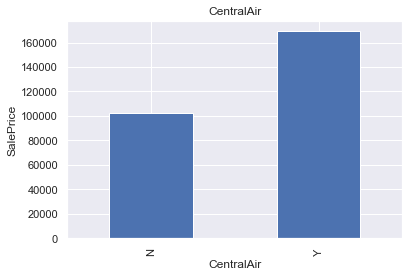

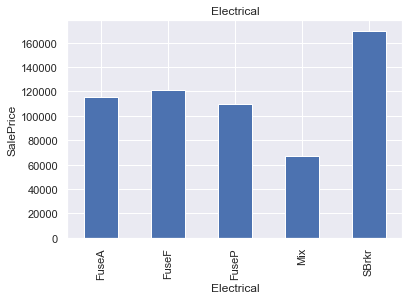

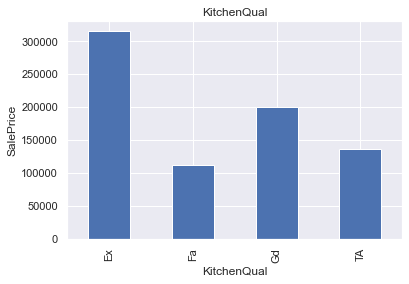

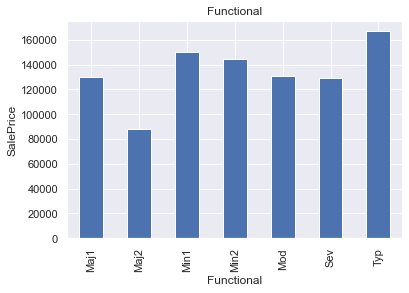

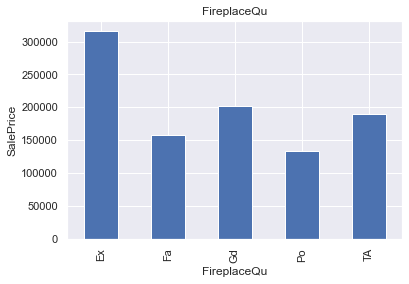

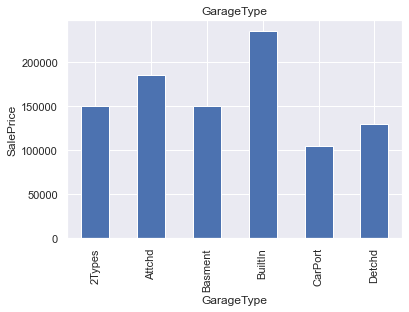

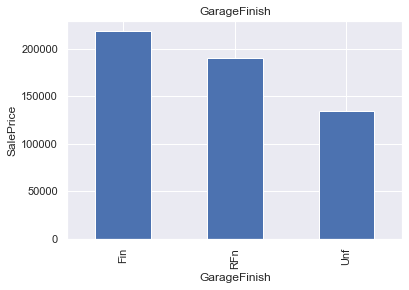

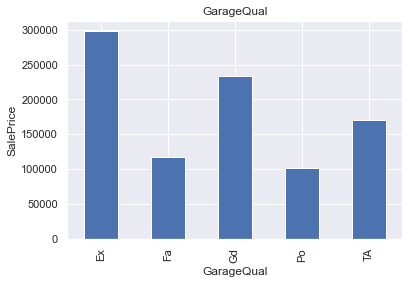

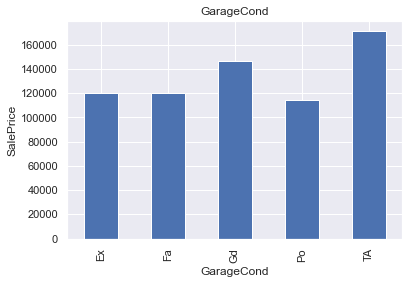

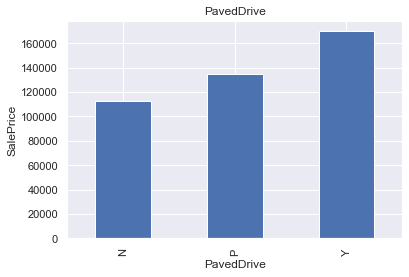

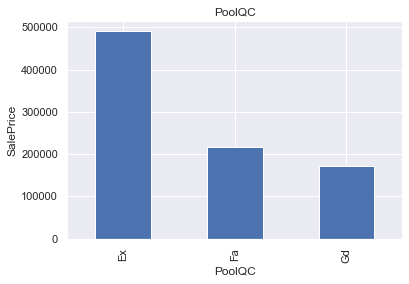

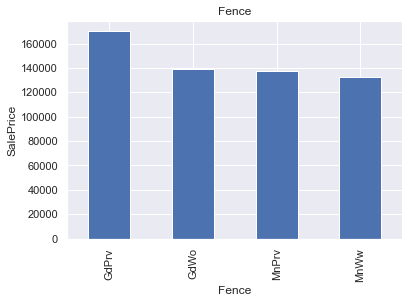

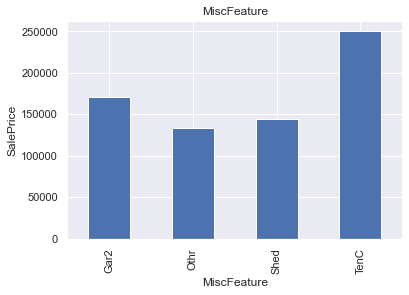

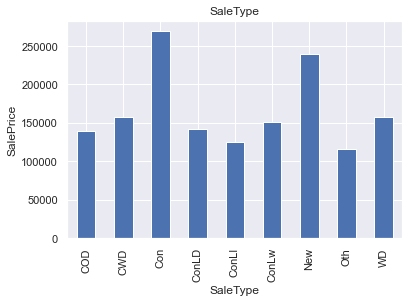

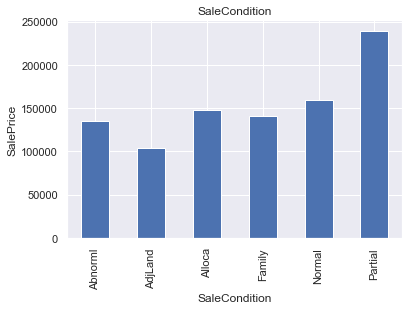

In [98]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Exploratory Data Analysis

In [100]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 0
Float variables: 3


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

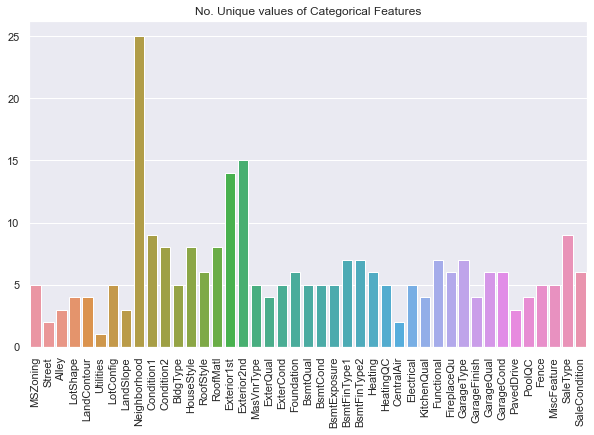

In [101]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

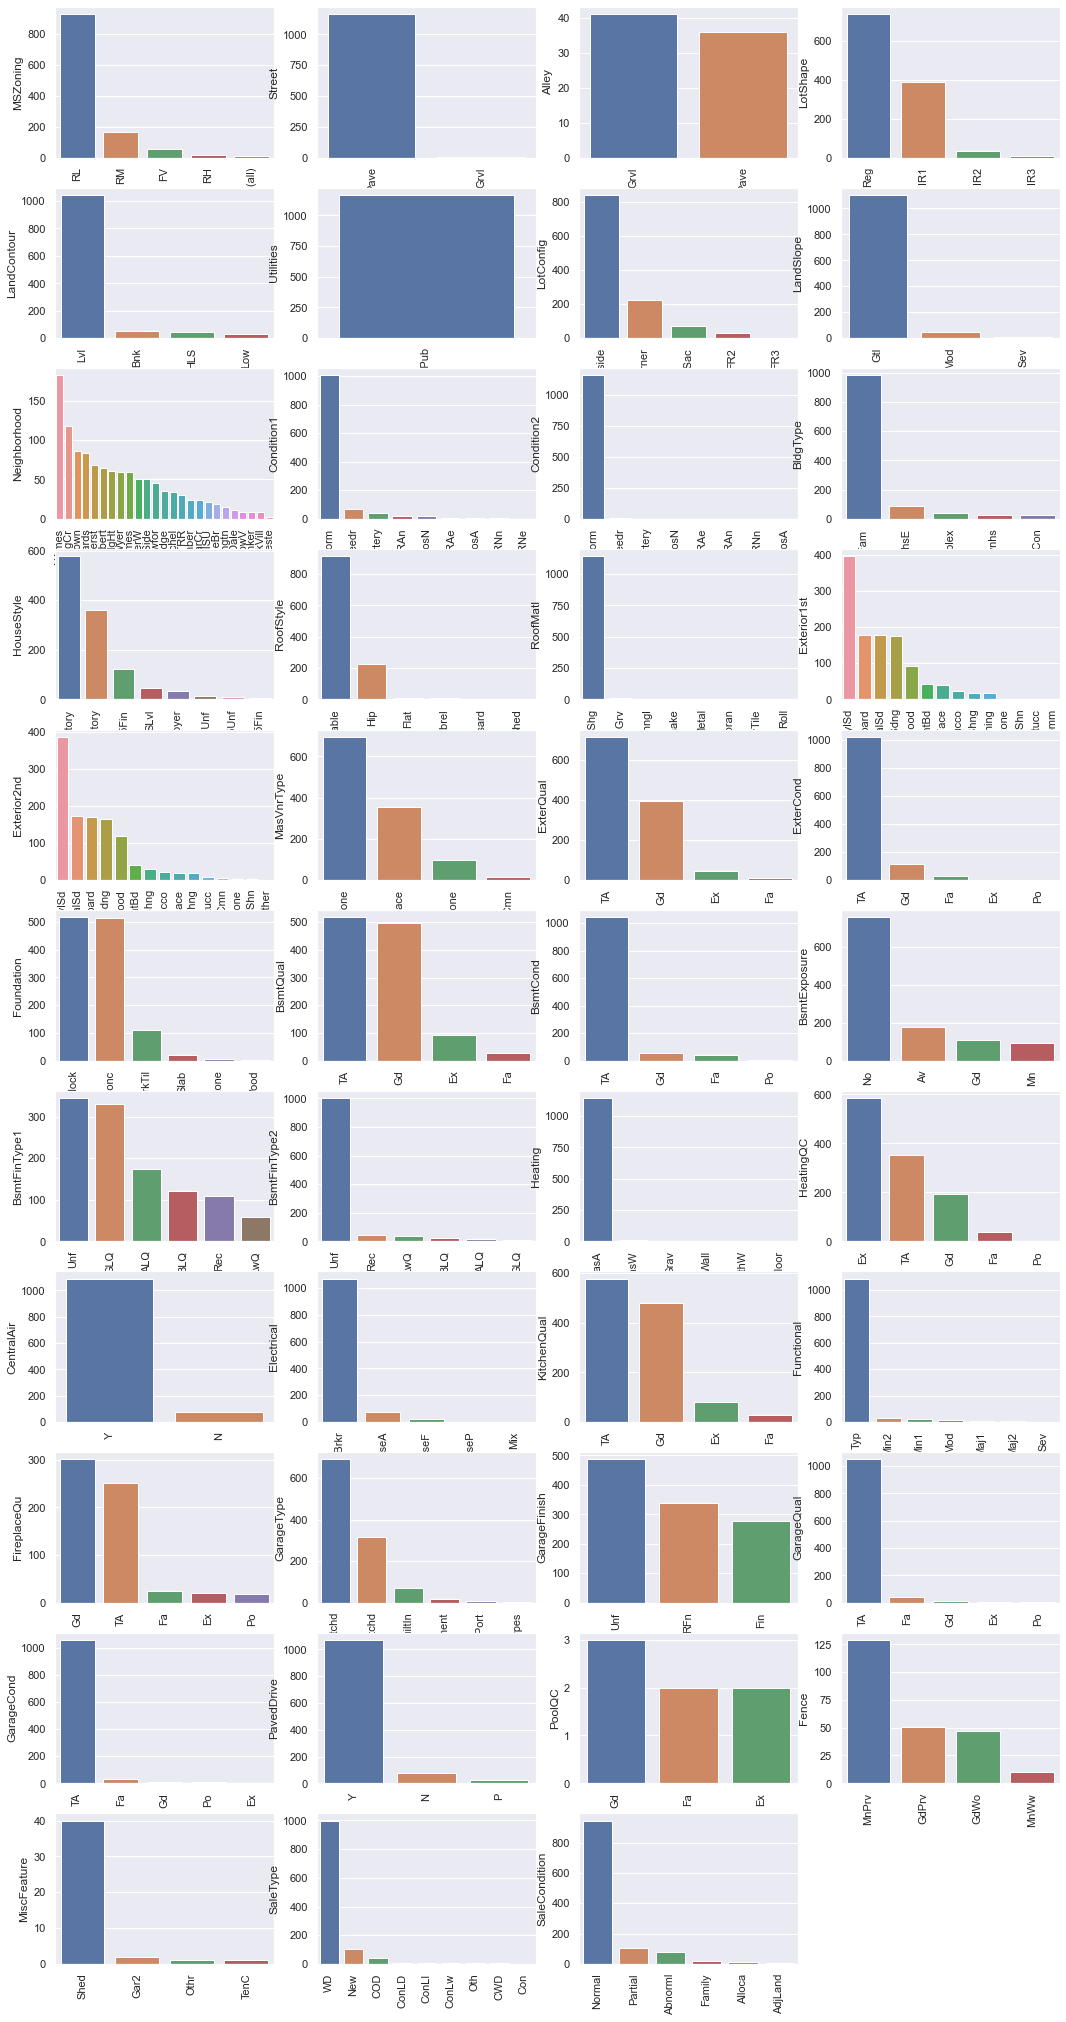

In [102]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

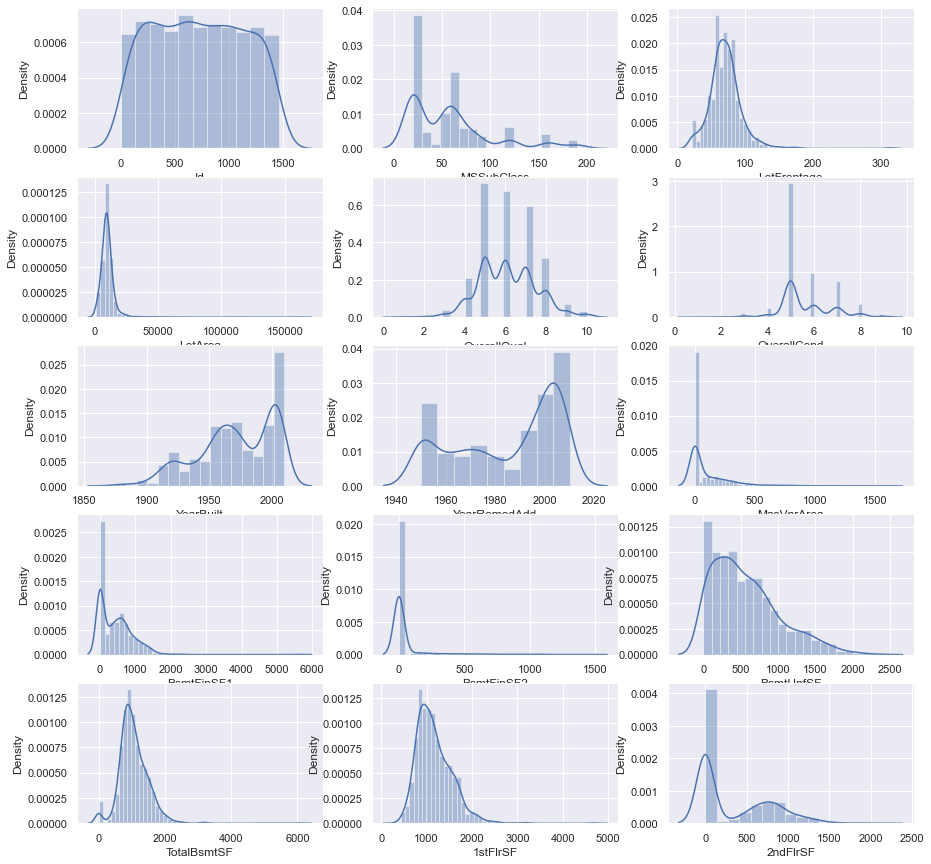

In [103]:
numerical = df._get_numeric_data().columns
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.savefig('distribution_before_removing_missing_values_from_numerical_columns.png')
    plt.show()
plotHist()

# Checking outliers in Numerical columns¶

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


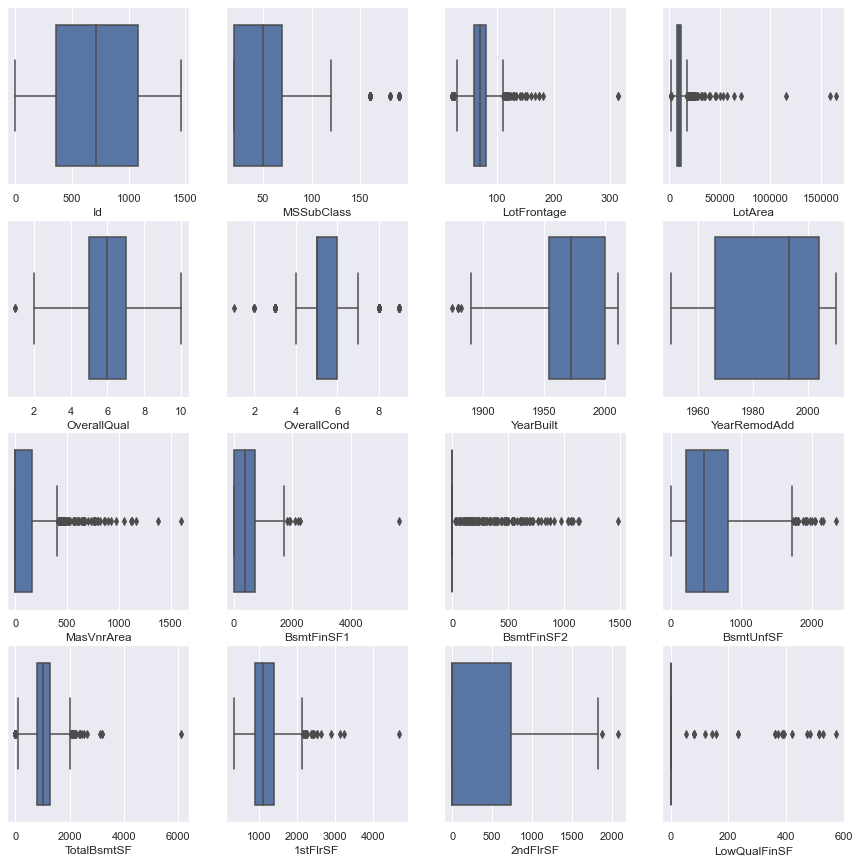

In [104]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

# Removing Outliers

In [105]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


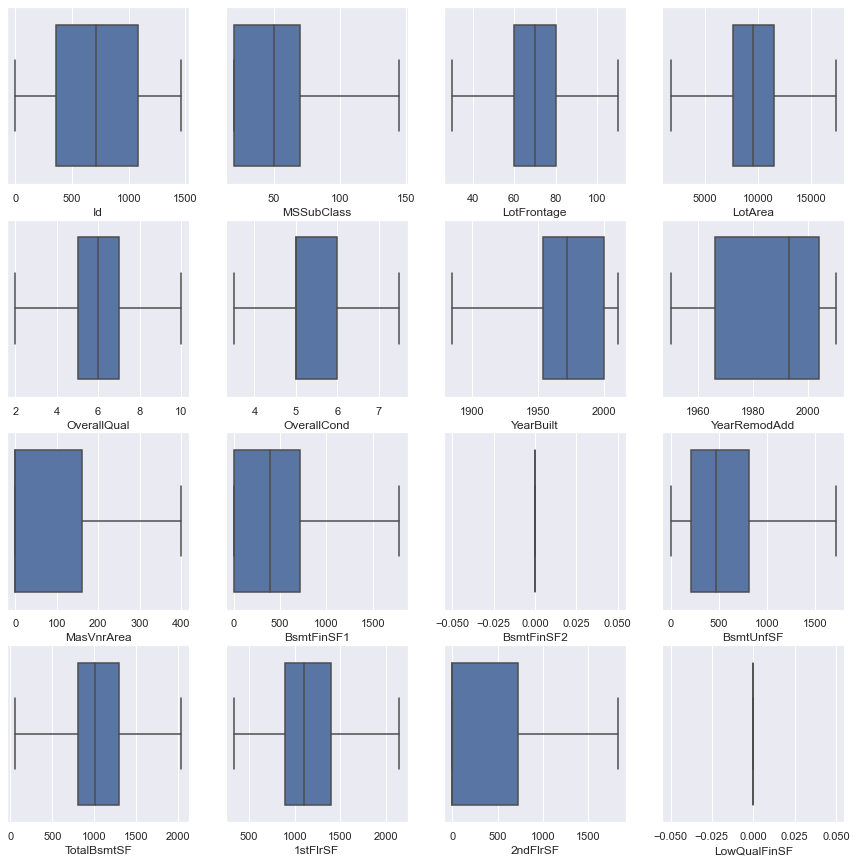

In [106]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

# House price by using Linear Regression Model

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [21]:
dataset=pd.read_csv('train housing.csv')
dataset.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [26]:
dataset=dataset.drop('Id',axis=1)
dataset

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
1             20       RL         95.0    15865   Pave   NaN      IR1   
2             60       RL         92.0     9920   Pave   NaN      IR1   
3             20       RL        105.0    11751   Pave   NaN      IR1   
4             20       RL          NaN    16635   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1163          20       RL          NaN     9819   Pave   NaN      IR1   
1164          20       RL         67.0     8777   Pave   NaN      Reg   
1165         160       RL         24.0     2280   Pave   NaN      Reg   
1166          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1163         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1164         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1165         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
1166         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1167         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2007        WD         Normal     128000  
1          0     10    2007        WD         Normal     268000  
2          0      6    2007        WD         Normal     269790  
3          0      1    2010       COD         Normal     190000  
4          0      6    2009        WD         Normal     215000  
...      ...    ...     ...       ...            ...        ...  
1163       0      2    2010        WD         Normal     122000  
1164       0      5    2009        WD         Normal     108000  
1165       0      7    2009        WD         Normal     148500  
1166       0      7    2008        WD         Normal      40000  
1167       0      6    2006        WD         Normal     183200  

[1168 rows x 80 columns]

In [27]:
dataset=dataset.drop('MSSubClass',axis=1)
dataset=dataset.drop('MSZoning',axis=1)
dataset=dataset.drop('LotFrontage',axis=1)
dataset=dataset.drop('Street',axis=1)
dataset=dataset.drop('Alley',axis=1)
dataset=dataset.drop('LotShape',axis=1)
dataset=dataset.drop('LandContour',axis=1)
dataset=dataset.drop('Utilities',axis=1)
dataset=dataset.drop('LotConfig',axis=1)
dataset=dataset.drop('PoolArea',axis=1)
dataset=dataset.drop('PoolQC',axis=1)
dataset=dataset.drop('Fence',axis=1)
dataset=dataset.drop('MiscFeature',axis=1)
dataset=dataset.drop('MiscVal',axis=1)
dataset=dataset.drop('MoSold',axis=1)
dataset=dataset.drop('YrSold',axis=1)
dataset=dataset.drop('SaleType',axis=1)
dataset=dataset.drop('SaleCondition',axis=1)
dataset

LotArea LandSlope Neighborhood Condition1 Condition2 BldgType  \
0        4928       Gtl      NPkVill       Norm       Norm   TwnhsE   
1       15865       Mod        NAmes       Norm       Norm     1Fam   
2        9920       Gtl      NoRidge       Norm       Norm     1Fam   
3       11751       Gtl       NWAmes       Norm       Norm     1Fam   
4       16635       Gtl       NWAmes       Norm       Norm     1Fam   
...       ...       ...          ...        ...        ...      ...   
1163     9819       Gtl       Sawyer       Norm       Norm     1Fam   
1164     8777       Gtl      Edwards      Feedr       Norm     1Fam   
1165     2280       Gtl      NPkVill       Norm       Norm    Twnhs   
1166     8500       Gtl       IDOTRR      Feedr       Norm     1Fam   
1167     7861       Gtl      Gilbert       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageArea  \
0        1Story            6            5       1976  ...         440   
1        1Story            8            6       1970  ...         621   
2        2Story            7            5       1996  ...         455   
3        1Story            6            6       1977  ...         546   
4        1Story            6            7       1977  ...         529   
...         ...          ...          ...        ...  ...         ...   
1163     1Story            5            5       1967  ...         280   
1164     1Story            4            5       1949  ...         520   
1165     2Story            6            6       1976  ...         440   
1166     2Story            4            4       1920  ...         250   
1167     2Story            6            5       2002  ...         393   

     GarageQual GarageCond PavedDrive WoodDeckSF OpenPorchSF  EnclosedPorch  \
0            TA         TA          Y          0         205              0   
1            TA         TA          Y         81         207              0   
2            TA         TA          Y        180         130              0   
3            TA         TA          Y          0         122              0   
4            TA         TA          Y        240           0              0   
...         ...        ...        ...        ...         ...            ...   
1163         TA         TA          Y          0           0              0   
1164         TA         TA          N          0          96              0   
1165         TA         TA          Y         87           0              0   
1166         TA         Fa          N          0          54            172   
1167         TA         TA          Y        100          75              0   

     3SsnPorch ScreenPorch SalePrice  
0            0           0    128000  
1            0         224    268000  
2            0           0    269790  
3            0           0    190000  
4            0           0    215000  
...        ...         ...       ...  
1163         0           0    122000  
1164         0           0    108000  
1165         0           0    148500  
1166         0           0     40000  
1167         0           0    183200  

[1168 rows x 62 columns]

In [33]:

dataset

LotArea Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        4928     CBlock       Gd       TA           No          ALQ   
1       15865      PConc       TA       Gd           Gd          ALQ   
2        9920      PConc       Gd       TA           Av          GLQ   
3       11751     CBlock       Gd       TA           No          BLQ   
4       16635     CBlock       Gd       TA           No          ALQ   
...       ...        ...      ...      ...          ...          ...   
1163     9819     CBlock       TA       TA           No          BLQ   
1164     8777     CBlock      NaN      NaN          NaN          NaN   
1165     2280     CBlock       Gd       TA           No          ALQ   
1166     8500     BrkTil       TA       TA           No          Unf   
1167     7861      PConc       Gd       TA           No          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  ...  HalfBath  \
0            120          Unf           0        958  ...         0   
1            351          Rec         823       1043  ...         0   
2            862          Unf           0        255  ...         1   
3            705          Unf           0       1139  ...         0   
4           1246          Unf           0        356  ...         0   
...          ...          ...         ...        ...  ...       ...   
1163         450          Unf           0        432  ...         0   
1164           0          NaN           0          0  ...         0   
1165         566          Unf           0        289  ...         1   
1166           0          Unf           0        649  ...         0   
1167         457          Unf           0        326  ...         1   

     BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd  Functional  \
0               2            1          TA            5         Typ   
1               4            1          Gd            8         Typ   
2               3            1          TA            8         Typ   
3               3            1          TA            7         Typ   
4               3            1          Gd            8         Typ   
...           ...          ...         ...          ...         ...   
1163            3            1          TA            5         Typ   
1164            2            1          Gd            5         Typ   
1165            3            1          TA            7         Typ   
1166            3            1          TA            6         Typ   
1167            3            1          Gd            7         Typ   

      EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  
0                 0          0            0     128000  
1                 0          0          224     268000  
2                 0          0            0     269790  
3                 0          0            0     190000  
4                 0          0            0     215000  
...             ...        ...          ...        ...  
1163              0          0            0     122000  
1164              0          0            0     108000  
1165              0          0            0     148500  
1166            172          0            0      40000  
1167              0          0            0     183200  

[1168 rows x 32 columns]

In [34]:
dataset=dataset.drop('Foundation',axis=1)
dataset=dataset.drop('BsmtQual',axis=1)
dataset=dataset.drop('BsmtCond',axis=1)
dataset=dataset.drop('BsmtExposure',axis=1)
dataset

LotArea BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0        4928          ALQ         120          Unf           0        958   
1       15865          ALQ         351          Rec         823       1043   
2        9920          GLQ         862          Unf           0        255   
3       11751          BLQ         705          Unf           0       1139   
4       16635          ALQ        1246          Unf           0        356   
...       ...          ...         ...          ...         ...        ...   
1163     9819          BLQ         450          Unf           0        432   
1164     8777          NaN           0          NaN           0          0   
1165     2280          ALQ         566          Unf           0        289   
1166     8500          Unf           0          Unf           0        649   
1167     7861          GLQ         457          Unf           0        326   

      TotalBsmtSF Heating HeatingQC CentralAir  ... HalfBath  BedroomAbvGr  \
0            1078    GasA        TA          Y  ...        0             2   
1            2217    GasA        Ex          Y  ...        0             4   
2            1117    GasA        Ex          Y  ...        1             3   
3            1844    GasA        Ex          Y  ...        0             3   
4            1602    GasA        Gd          Y  ...        0             3   
...           ...     ...       ...        ...  ...      ...           ...   
1163          882    GasA        TA          Y  ...        0             3   
1164            0    GasA        Ex          Y  ...        0             2   
1165          855    GasA        TA          Y  ...        1             3   
1166          649    GasA        TA          N  ...        0             3   
1167          783    GasA        Ex          Y  ...        1             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  EnclosedPorch  \
0                1           TA             5         Typ              0   
1                1           Gd             8         Typ              0   
2                1           TA             8         Typ              0   
3                1           TA             7         Typ              0   
4                1           Gd             8         Typ              0   
...            ...          ...           ...         ...            ...   
1163             1           TA             5         Typ              0   
1164             1           Gd             5         Typ              0   
1165             1           TA             7         Typ              0   
1166             1           TA             6         Typ            172   
1167             1           Gd             7         Typ              0   

      3SsnPorch  ScreenPorch  SalePrice  
0             0            0     128000  
1             0          224     268000  
2             0            0     269790  
3             0            0     190000  
4             0            0     215000  
...         ...          ...        ...  
1163          0            0     122000  
1164          0            0     108000  
1165          0            0     148500  
1166          0            0      40000  
1167          0            0     183200  

[1168 rows x 28 columns]

In [37]:

dataset

LotArea BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0        4928          ALQ         120          Unf           0        958   
1       15865          ALQ         351          Rec         823       1043   
2        9920          GLQ         862          Unf           0        255   
3       11751          BLQ         705          Unf           0       1139   
4       16635          ALQ        1246          Unf           0        356   
...       ...          ...         ...          ...         ...        ...   
1163     9819          BLQ         450          Unf           0        432   
1164     8777          NaN           0          NaN           0          0   
1165     2280          ALQ         566          Unf           0        289   
1166     8500          Unf           0          Unf           0        649   
1167     7861          GLQ         457          Unf           0        326   

      TotalBsmtSF Heating HeatingQC CentralAir  ... HalfBath  BedroomAbvGr  \
0            1078    GasA        TA          Y  ...        0             2   
1            2217    GasA        Ex          Y  ...        0             4   
2            1117    GasA        Ex          Y  ...        1             3   
3            1844    GasA        Ex          Y  ...        0             3   
4            1602    GasA        Gd          Y  ...        0             3   
...           ...     ...       ...        ...  ...      ...           ...   
1163          882    GasA        TA          Y  ...        0             3   
1164            0    GasA        Ex          Y  ...        0             2   
1165          855    GasA        TA          Y  ...        1             3   
1166          649    GasA        TA          N  ...        0             3   
1167          783    GasA        Ex          Y  ...        1             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  EnclosedPorch  \
0                1           TA             5         Typ              0   
1                1           Gd             8         Typ              0   
2                1           TA             8         Typ              0   
3                1           TA             7         Typ              0   
4                1           Gd             8         Typ              0   
...            ...          ...           ...         ...            ...   
1163             1           TA             5         Typ              0   
1164             1           Gd             5         Typ              0   
1165             1           TA             7         Typ              0   
1166             1           TA             6         Typ            172   
1167             1           Gd             7         Typ              0   

      3SsnPorch  ScreenPorch  SalePrice  
0             0            0     128000  
1             0          224     268000  
2             0            0     269790  
3             0            0     190000  
4             0            0     215000  
...         ...          ...        ...  
1163          0            0     122000  
1164          0            0     108000  
1165          0            0     148500  
1166          0            0      40000  
1167          0            0     183200  

[1168 rows x 28 columns]

In [39]:
dataset

LotArea CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        4928          Y      SBrkr       958         0             0   
1       15865          Y      SBrkr      2217         0             0   
2        9920          Y      SBrkr      1127       886             0   
3       11751          Y      SBrkr      1844         0             0   
4       16635          Y      SBrkr      1602         0             0   
...       ...        ...        ...       ...       ...           ...   
1163     9819          Y      SBrkr       900         0             0   
1164     8777          Y      SBrkr      1126         0             0   
1165     2280          Y      SBrkr       855       601             0   
1166     8500          N      SBrkr       649       668             0   
1167     7861          Y      SBrkr       807       702             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           958             0             0         2         0             2   
1          2217             1             0         2         0             4   
2          2013             1             0         2         1             3   
3          1844             0             0         2         0             3   
4          1602             0             1         2         0             3   
...         ...           ...           ...       ...       ...           ...   
1163        900             0             0         1         0             3   
1164       1126             0             0         2         0             2   
1165       1456             0             0         2         1             3   
1166       1317             0             0         1         0             3   
1167       1509             1             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  EnclosedPorch  \
0                1          TA             5        Typ              0   
1                1          Gd             8        Typ              0   
2                1          TA             8        Typ              0   
3                1          TA             7        Typ              0   
4                1          Gd             8        Typ              0   
...            ...         ...           ...        ...            ...   
1163             1          TA             5        Typ              0   
1164             1          Gd             5        Typ              0   
1165             1          TA             7        Typ              0   
1166             1          TA             6        Typ            172   
1167             1          Gd             7        Typ              0   

      3SsnPorch  ScreenPorch  SalePrice  
0             0            0     128000  
1             0          224     268000  
2             0            0     269790  
3             0            0     190000  
4             0            0     215000  
...         ...          ...        ...  
1163          0            0     122000  
1164          0            0     108000  
1165          0            0     148500  
1166          0            0      40000  
1167          0            0     183200  

[1168 rows x 20 columns]

In [40]:
dataset=dataset.drop('CentralAir',axis=1)
dataset=dataset.drop('Electrical',axis=1)
dataset=dataset.drop('1stFlrSF',axis=1)
dataset=dataset.drop('2ndFlrSF',axis=1)
dataset=dataset.drop('LowQualFinSF',axis=1)
dataset=dataset.drop('GrLivArea',axis=1)
dataset=dataset.drop('BsmtFullBath',axis=1)
dataset=dataset.drop('BsmtHalfBath',axis=1)
dataset=dataset.drop('FullBath',axis=1)
dataset

LotArea  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0        4928         0             2             1          TA             5   
1       15865         0             4             1          Gd             8   
2        9920         1             3             1          TA             8   
3       11751         0             3             1          TA             7   
4       16635         0             3             1          Gd             8   
...       ...       ...           ...           ...         ...           ...   
1163     9819         0             3             1          TA             5   
1164     8777         0             2             1          Gd             5   
1165     2280         1             3             1          TA             7   
1166     8500         0             3             1          TA             6   
1167     7861         1             3             1          Gd             7   

     Functional  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  
0           Typ              0          0            0     128000  
1           Typ              0          0          224     268000  
2           Typ              0          0            0     269790  
3           Typ              0          0            0     190000  
4           Typ              0          0            0     215000  
...         ...            ...        ...          ...        ...  
1163        Typ              0          0            0     122000  
1164        Typ              0          0            0     108000  
1165        Typ              0          0            0     148500  
1166        Typ            172          0            0      40000  
1167        Typ              0          0            0     183200  

[1168 rows x 11 columns]

In [41]:
dataset=dataset.drop('HalfBath',axis=1)
dataset=dataset.drop('BedroomAbvGr',axis=1)
dataset=dataset.drop('KitchenAbvGr',axis=1)
dataset=dataset.drop('KitchenQual',axis=1)
dataset=dataset.drop('TotRmsAbvGrd',axis=1)
dataset=dataset.drop('Functional',axis=1)
dataset=dataset.drop('EnclosedPorch',axis=1)
dataset=dataset.drop('3SsnPorch',axis=1)
dataset=dataset.drop('ScreenPorch',axis=1)
dataset

LotArea  SalePrice
0        4928     128000
1       15865     268000
2        9920     269790
3       11751     190000
4       16635     215000
...       ...        ...
1163     9819     122000
1164     8777     108000
1165     2280     148500
1166     8500      40000
1167     7861     183200

[1168 rows x 2 columns]

# Segregate Dataset into Input X & Output Y

In [42]:
X = dataset.drop('SalePrice',axis='columns')
X

LotArea
0        4928
1       15865
2        9920
3       11751
4       16635
...       ...
1163     9819
1164     8777
1165     2280
1166     8500
1167     7861

[1168 rows x 1 columns]

In [43]:
Y = dataset.SalePrice
Y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

# Training Dataset using Linear Regression

In [44]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

# Predicted Price for Land in Area in square Feet of custom values

In [47]:
x=148500
LandAreainSqFt=[[x]]
PredictedmodelResult = model.predict(LandAreainSqFt)
print(PredictedmodelResult)

[485578.29096248]


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


As x=148500 is an example for calculating the Saleprice for LotArea.We can take any values from saleprice column to calculate the LotArea.

# Let's check is our model is Right ?
Theory Calculation
Y = m * X + b (m is coefficient and b is intercept)
Coefficient - m

In [48]:
m=model.coef_
print(m)

[2.203389]


# Intercept - b

In [49]:
b=model.intercept_
print(b)

158375.0251073978


# Y=mx+b
x is Independant variable - Input - area

In [50]:
y = m*x + b
print("The Price of {0} Square feet Land is: {1}".format(x,y[0]))

The Price of 148500 Square feet Land is: 485578.29096248123
